In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# --- 1. Φόρτωση δεδομένων ---
df = pd.read_csv("cleaned_dataset.csv")


In [2]:
#Επειδή το dataset που δουλέψαμε είναι μεγάλο (114.000 εγγραφές), παίρνει πολύ χρόνο
# Μείωση του dataset σε 5,000 τυχαία δείγματα
df_reduced = df.sample(n=5000, random_state=42)

# Επαλήθευση του μεγέθους του νέου dataset
print(f"Το νέο μέγεθος του dataset είναι: {df_reduced.shape[0]} δείγματα και {df_reduced.shape[1]} χαρακτηριστικά.")

Το νέο μέγεθος του dataset είναι: 5000 δείγματα και 21 χαρακτηριστικά.


In [3]:
# Επιλογή χαρακτηριστικών
features = ['danceability', 'energy', 'valence', 'tempo','popularity']

# Υποθέτουμε ότι το dataframe σου είναι το df
print(df_reduced[features].describe())  # Για να δεις τις βασικές στατιστικές των χαρακτηριστικών

       danceability       energy      valence        tempo  popularity
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.00000
mean       0.565803     0.646026     0.469626   122.612583    32.84160
std        0.170355     0.252262     0.261305    29.107431    22.47182
min        0.107000     0.000020     0.000000    49.296000     0.00000
25%        0.453000     0.471000     0.249000    99.994000    16.00000
50%        0.579000     0.689000     0.456000   122.667500    34.00000
75%        0.692000     0.859000     0.681250   140.078000    50.00000
max        0.975000     1.000000     0.992000   200.074000    93.00000


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Δημιουργία scaler
scaler = MinMaxScaler()

# Στήλες που θέλουμε να κανονικοποιήσουμε
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Εφαρμογή Min-Max Scaling
df_reduced[columns_to_normalize] = scaler.fit_transform(df_reduced[columns_to_normalize])

# Επαλήθευση κανονικοποίησης
print(df_reduced[columns_to_normalize].describe())

       danceability       energy      valence        tempo   popularity
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean       0.528575     0.646018     0.473413     0.486255     0.353135
std        0.196261     0.252267     0.263412     0.193048     0.241632
min        0.000000     0.000000     0.000000     0.000000     0.000000
25%        0.398618     0.470989     0.251008     0.336243     0.172043
50%        0.543779     0.688994     0.459677     0.486619     0.365591
75%        0.673963     0.858997     0.686744     0.602090     0.537634
max        1.000000     1.000000     1.000000     1.000000     1.000000


Για k = 2, το Silhouette Score στο training set είναι: 0.3800
Για k = 3, το Silhouette Score στο training set είναι: 0.4143
Για k = 4, το Silhouette Score στο training set είναι: 0.3789
Για k = 5, το Silhouette Score στο training set είναι: 0.3475
Για k = 6, το Silhouette Score στο training set είναι: 0.3549
Για k = 7, το Silhouette Score στο training set είναι: 0.3432
Για k = 8, το Silhouette Score στο training set είναι: 0.3556
Για k = 9, το Silhouette Score στο training set είναι: 0.3478
Για k = 10, το Silhouette Score στο training set είναι: 0.3424


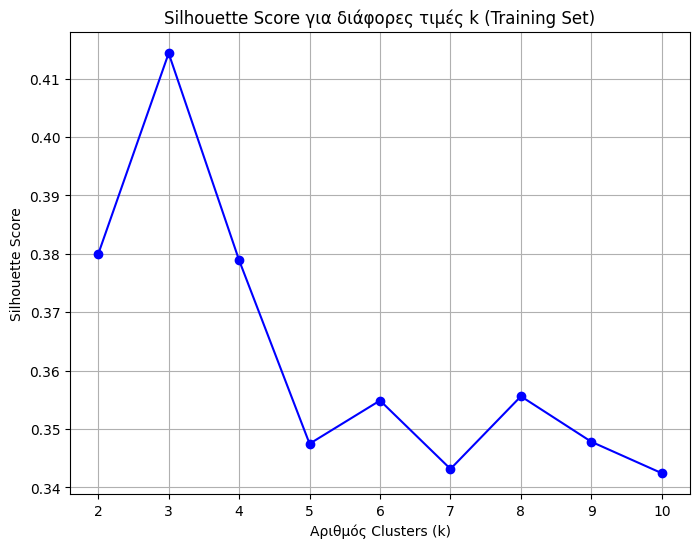

Το βέλτιστο k είναι: 3

Εκτέλεση 1 K-Means clustering με k = 3:
Silhouette Score (training set): 0.4106
Calinski-Harabasz Index (training set): 3671.9269
Davies-Bouldin Index (training set): 0.8221
Adjusted Rand Index (ARI) (training set): 1.0000
Inertia (training set): 214.0563
Silhouette Score (test set): 0.4149
----------------------------------------


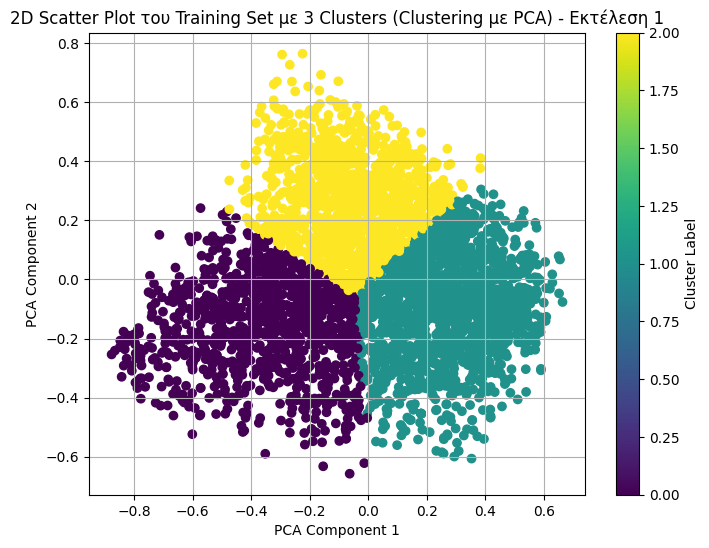


Εκτέλεση 2 K-Means clustering με k = 3:
Silhouette Score (training set): 0.4101
Calinski-Harabasz Index (training set): 3649.7314
Davies-Bouldin Index (training set): 0.8242
Adjusted Rand Index (ARI) (training set): 1.0000
Inertia (training set): 214.8483
Silhouette Score (test set): 0.3854
----------------------------------------


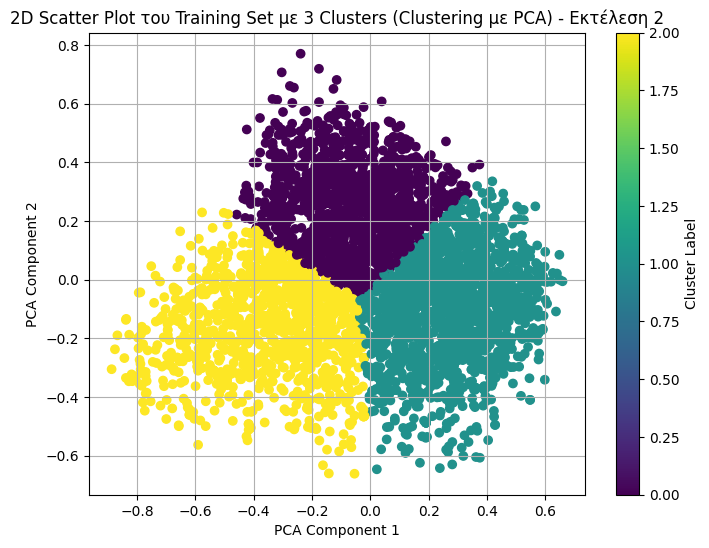


Εκτέλεση 3 K-Means clustering με k = 3:
Silhouette Score (training set): 0.4000
Calinski-Harabasz Index (training set): 3525.8337
Davies-Bouldin Index (training set): 0.8433
Adjusted Rand Index (ARI) (training set): 1.0000
Inertia (training set): 220.4637
Silhouette Score (test set): 0.4062
----------------------------------------


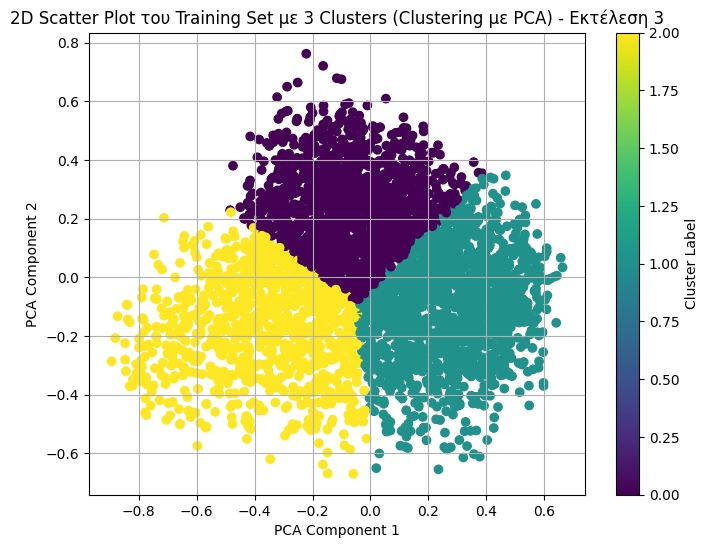


Εκτέλεση 4 K-Means clustering με k = 3:
Silhouette Score (training set): 0.3652
Calinski-Harabasz Index (training set): 3115.4284
Davies-Bouldin Index (training set): 0.9148
Adjusted Rand Index (ARI) (training set): 1.0000
Inertia (training set): 238.7123
Silhouette Score (test set): 0.3674
----------------------------------------


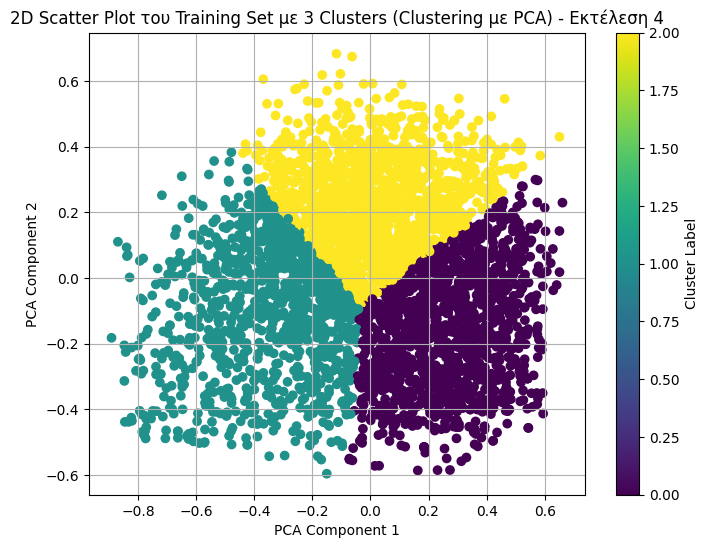


Εκτέλεση 5 K-Means clustering με k = 3:
Silhouette Score (training set): 0.4097
Calinski-Harabasz Index (training set): 3606.5450
Davies-Bouldin Index (training set): 0.8286
Adjusted Rand Index (ARI) (training set): 1.0000
Inertia (training set): 215.6593
Silhouette Score (test set): 0.4130
----------------------------------------


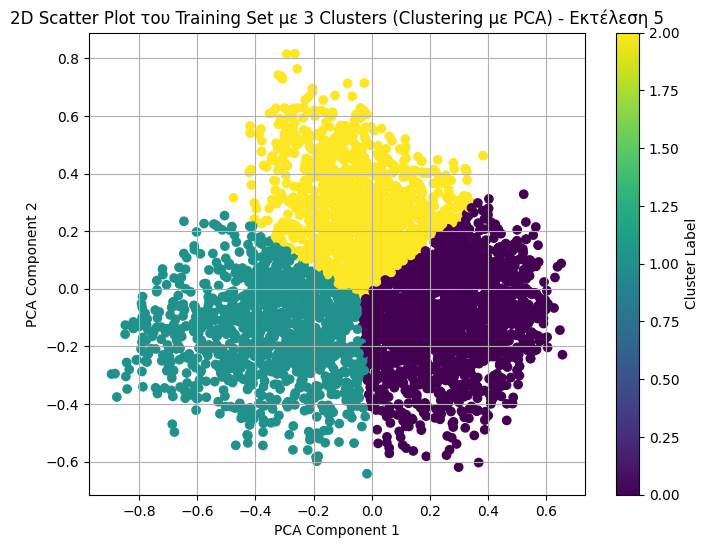

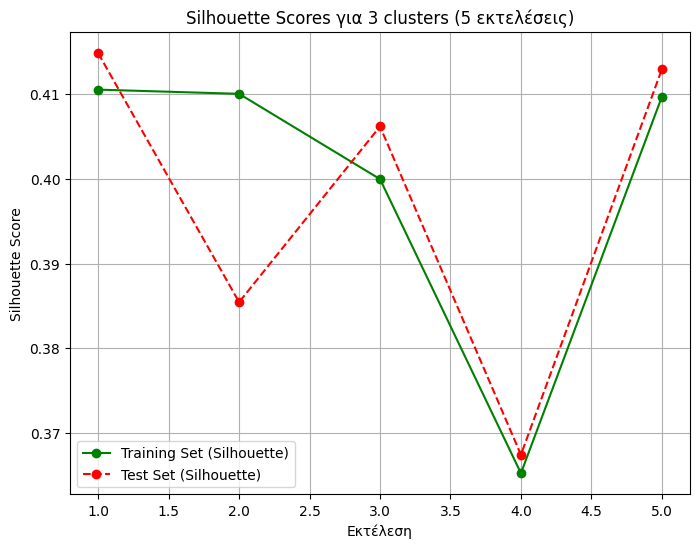

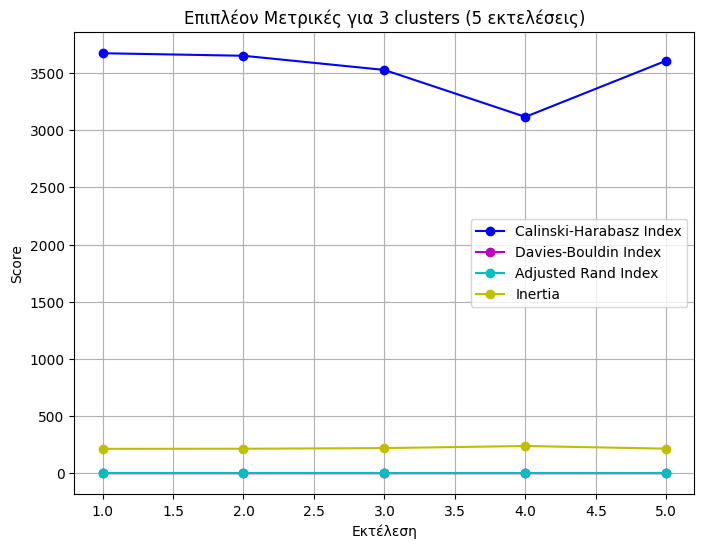

In [22]:
#KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Στήλες που θέλουμε να κανονικοποιήσουμε
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Εύρεση του βέλτιστου k στο training set
k_values = range(2, 11)
silhouette_scores_train = []

for k in k_values:
    # Διαχωρισμός δεδομένων κάθε φορά
    train_data, test_data = train_test_split(df_reduced[columns_to_normalize], test_size=0.2, random_state=42)

    # Εφαρμογή PCA πριν από την εκτέλεση του K-Means
    n_components = 2  # Αριθμός συνιστωσών PCA που θέλουμε να κρατήσουμε


    pca = PCA(n_components=n_components)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

    # Εκτέλεση του K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(train_data_pca)
    score = silhouette_score(train_data_pca, cluster_labels)
    silhouette_scores_train.append(score)
    print(f"Για k = {k}, το Silhouette Score στο training set είναι: {score:.4f}")

# Οπτικοποίηση Silhouette Scores για training set
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores_train, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score για διάφορες τιμές k (Training Set)')
plt.xlabel('Αριθμός Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Επιλογή του βέλτιστου k
optimal_k = k_values[np.argmax(silhouette_scores_train)]
print(f"Το βέλτιστο k είναι: {optimal_k}")

# Εκτέλεση K-Means 5 φορές με το βέλτιστο k
silhouette_scores_train_5 = []
silhouette_scores_test_5 = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
adjusted_rand_scores = []  # για το Adjusted Rand Index
inertia_scores = []  # για την inertia

for i in range(1, 6):
    print(f"\nΕκτέλεση {i} K-Means clustering με k = {optimal_k}:")

    # Διαχωρισμός δεδομένων κάθε φορά
    train_data, test_data = train_test_split(df_reduced[columns_to_normalize], test_size=0.2, random_state=i)

    # Εφαρμογή PCA πριν από την εκτέλεση του K-Means
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

    kmeans = KMeans(n_clusters=optimal_k, random_state=i)
    cluster_labels_train = kmeans.fit_predict(train_data_pca)

    # Υπολογισμός Silhouette Score στο training set
    silhouette_train = silhouette_score(train_data_pca, cluster_labels_train)
    silhouette_scores_train_5.append(silhouette_train)
    print(f"Silhouette Score (training set): {silhouette_train:.4f}")

    # Υπολογισμός Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(train_data_pca, cluster_labels_train)
    calinski_harabasz_scores.append(calinski_harabasz)
    print(f"Calinski-Harabasz Index (training set): {calinski_harabasz:.4f}")

    # Υπολογισμός Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(train_data_pca, cluster_labels_train)
    davies_bouldin_scores.append(davies_bouldin)
    print(f"Davies-Bouldin Index (training set): {davies_bouldin:.4f}")

    # Υπολογισμός Adjusted Rand Index (ARI)
    adjusted_rand = adjusted_rand_score(cluster_labels_train, cluster_labels_train)
    adjusted_rand_scores.append(adjusted_rand)
    print(f"Adjusted Rand Index (ARI) (training set): {adjusted_rand:.4f}")

    # Υπολογισμός Inertia (within-cluster sum of squares)
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)
    print(f"Inertia (training set): {inertia:.4f}")

    # Εφαρμογή στο test set
    cluster_labels_test = kmeans.predict(test_data_pca)
    silhouette_test = silhouette_score(test_data_pca, cluster_labels_test)
    silhouette_scores_test_5.append(silhouette_test)
    print(f"Silhouette Score (test set): {silhouette_test:.4f}")
    print("-" * 40)

    # Δημιουργία 2D Scatter Plot για το Training Set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=cluster_labels_train, cmap='viridis', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με {optimal_k} Clusters (Clustering με PCA) - Εκτέλεση {i}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Οπτικοποίηση αποτελεσμάτων Silhouette Scores από τις 5 εκτελέσεις
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), silhouette_scores_train_5, marker='o', linestyle='-', color='g', label="Training Set (Silhouette)")
plt.plot(range(1, 6), silhouette_scores_test_5, marker='o', linestyle='--', color='r', label="Test Set (Silhouette)")
plt.title(f"Silhouette Scores για {optimal_k} clusters (5 εκτελέσεις)")
plt.xlabel("Εκτέλεση")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

# Οπτικοποίηση επιπλέον μετρικών
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), calinski_harabasz_scores, marker='o', linestyle='-', color='b', label="Calinski-Harabasz Index")
plt.plot(range(1, 6), davies_bouldin_scores, marker='o', linestyle='-', color='m', label="Davies-Bouldin Index")
plt.plot(range(1, 6), adjusted_rand_scores, marker='o', linestyle='-', color='c', label="Adjusted Rand Index")
plt.plot(range(1, 6), inertia_scores, marker='o', linestyle='-', color='y', label="Inertia")
plt.title(f"Επιπλέον Μετρικές για {optimal_k} clusters (5 εκτελέσεις)")
plt.xlabel("Εκτέλεση")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()



--- Εκτέλεση 1 ---
Βέλτιστο eps: 0.1
Βέλτιστο min_samples: 5
Βέλτιστο Silhouette Score: 0.1106

--- Μετρικές στο Training Set ---
Silhouette Score: 0.1106
Calinski-Harabasz Index: 14.9176
Davies-Bouldin Index: 3.3336
Inertia: 805.2252
ARI: 1.0000


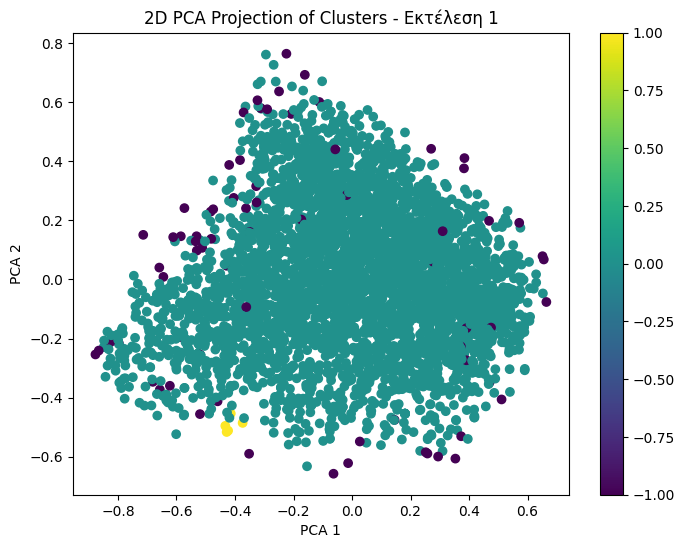


--- Εκτέλεση 2 ---
Βέλτιστο eps: 0.1
Βέλτιστο min_samples: 3
Βέλτιστο Silhouette Score: 0.1916

--- Μετρικές στο Training Set ---
Silhouette Score: 0.1916
Calinski-Harabasz Index: 9.7331
Davies-Bouldin Index: 3.3883
Inertia: 819.1140
ARI: 1.0000


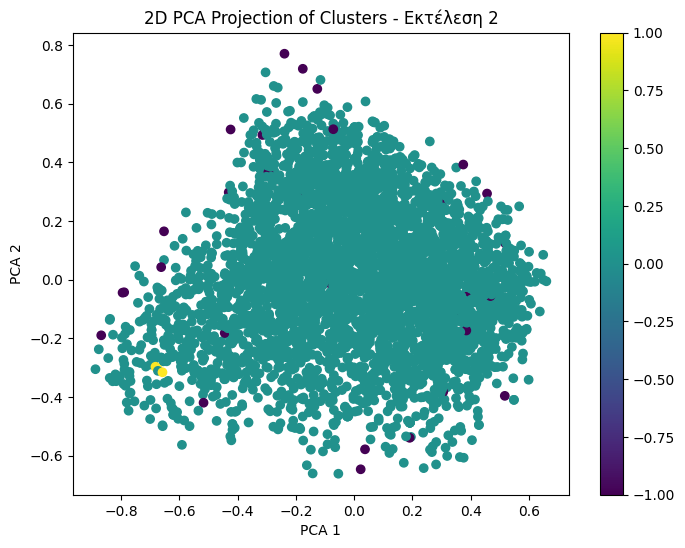


--- Εκτέλεση 3 ---
Βέλτιστο eps: 0.1
Βέλτιστο min_samples: 3
Βέλτιστο Silhouette Score: 0.1761

--- Μετρικές στο Training Set ---
Silhouette Score: 0.1761
Calinski-Harabasz Index: 8.2713
Davies-Bouldin Index: 3.8814
Inertia: 827.2182
ARI: 1.0000


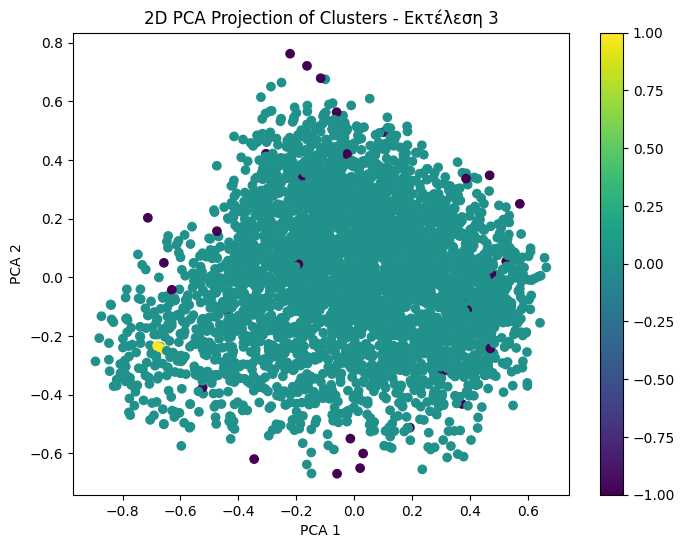


--- Εκτέλεση 4 ---
Βέλτιστο eps: 0.1
Βέλτιστο min_samples: 7
Βέλτιστο Silhouette Score: 0.0986

--- Μετρικές στο Training Set ---
Silhouette Score: 0.0986
Calinski-Harabasz Index: 34.4688
Davies-Bouldin Index: 2.7283
Inertia: 783.8093
ARI: 1.0000


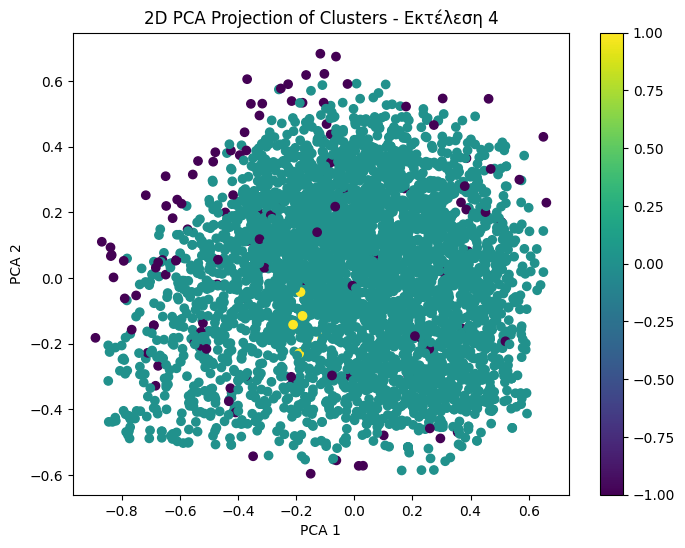


--- Εκτέλεση 5 ---
Βέλτιστο eps: 0.1
Βέλτιστο min_samples: 6
Βέλτιστο Silhouette Score: 0.1300

--- Μετρικές στο Training Set ---
Silhouette Score: 0.1300
Calinski-Harabasz Index: 27.1160
Davies-Bouldin Index: 2.7448
Inertia: 787.9043
ARI: 1.0000


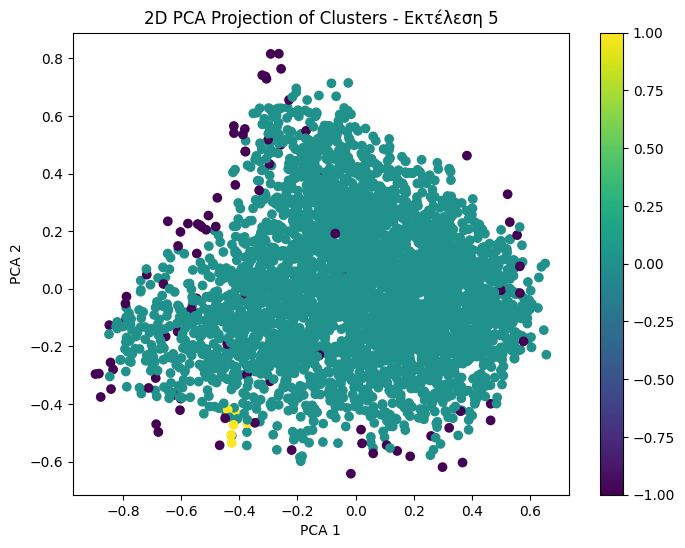


--- Συνολικά Αποτελέσματα ---
Εκτέλεση 1: Βέλτιστο eps=0.1, min_samples=5, Silhouette Train=0.1106, Calinski-Harabasz Train=14.9176, Davies-Bouldin Train=3.3336, Inertia Train=805.2252, ARI Train=1.0000
Εκτέλεση 2: Βέλτιστο eps=0.1, min_samples=3, Silhouette Train=0.1916, Calinski-Harabasz Train=9.7331, Davies-Bouldin Train=3.3883, Inertia Train=819.1140, ARI Train=1.0000
Εκτέλεση 3: Βέλτιστο eps=0.1, min_samples=3, Silhouette Train=0.1761, Calinski-Harabasz Train=8.2713, Davies-Bouldin Train=3.8814, Inertia Train=827.2182, ARI Train=1.0000
Εκτέλεση 4: Βέλτιστο eps=0.1, min_samples=7, Silhouette Train=0.0986, Calinski-Harabasz Train=34.4688, Davies-Bouldin Train=2.7283, Inertia Train=783.8093, ARI Train=1.0000
Εκτέλεση 5: Βέλτιστο eps=0.1, min_samples=6, Silhouette Train=0.1300, Calinski-Harabasz Train=27.1160, Davies-Bouldin Train=2.7448, Inertia Train=787.9043, ARI Train=1.0000


In [23]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score as ari
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Στήλες που θέλουμε να κανονικοποιήσουμε
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση του DBSCAN 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, test_data = train_test_split(df_reduced[columns_to_normalize], test_size=0.2, random_state=iteration)

    # Εφαρμογή PCA πριν από την εκτέλεση του DBSCAN
    n_components = 3  # Αριθμός συνιστωσών PCA που θέλουμε να κρατήσουμε


    pca = PCA(n_components=n_components)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = pca.transform(test_data)

    # Εύρος τιμών για eps και min_samples
    eps_values = np.arange(0.1, 1.1, 0.1)  # Από 0.1 έως 1.0 με βήμα 0.1
    min_samples_values = range(3, 11)  # Από 3 έως 10

    # Αποθήκευση αποτελεσμάτων
    best_silhouette = -1
    best_params = {"eps": None, "min_samples": None}

    # Πλέγμα τιμών (grid search) για εύρεση βέλτιστων παραμέτρων
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels_train = dbscan.fit_predict(train_data_pca)

            # Παρακάμπτουμε συνδυασμούς που παράγουν μόνο noise
            if len(set(cluster_labels_train)) == 1 and -1 in set(cluster_labels_train):
                continue

            # Υπολογισμός αριθμού clusters
            n_clusters = len(set(cluster_labels_train)) - (1 if -1 in cluster_labels_train else 0)  # Δεν μετράμε το noise
            if n_clusters < 2:  # Παρακάμπτουμε συνδυασμούς με λιγότερα από 2 clusters
                continue

            # Υπολογισμός μετρικών
            silhouette_avg = silhouette_score(train_data_pca, cluster_labels_train)

            # Ενημέρωση βέλτιστων παραμέτρων βάσει Silhouette Score
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_params = {"eps": eps, "min_samples": min_samples}

    # Έλεγχος αν βρέθηκαν έγκυρες παράμετροι
    if best_params['eps'] is None or best_params['min_samples'] is None:
        print("Δεν βρέθηκαν έγκυρες παράμετροι για αυτή την εκτέλεση.")
        continue

    print(f"Βέλτιστο eps: {best_params['eps']}")
    print(f"Βέλτιστο min_samples: {best_params['min_samples']}")
    print(f"Βέλτιστο Silhouette Score: {best_silhouette:.4f}")

    # Εκτέλεση DBSCAN με βέλτιστες παραμέτρους
    dbscan_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    cluster_labels_train = dbscan_best.fit_predict(train_data_pca)

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data_pca, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data_pca, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data_pca, cluster_labels_train)

    # Υπολογισμός Inertia για το training set
    inertia_train = 0
    for cluster_id in set(cluster_labels_train):
        if cluster_id != -1:  # Αγνοούμε το noise (-1)
            cluster_points = train_data_pca[cluster_labels_train == cluster_id]
            centroid = cluster_points.mean(axis=0)
            inertia_train += np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)

    # Υπολογισμός ARI για το training set (αυτοσχέδιο γιατί δεν έχουμε ground truth labels)
    ari_train_value = ari(cluster_labels_train, cluster_labels_train)

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "best_eps": best_params['eps'],
        "best_min_samples": best_params['min_samples'],
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "inertia_train": inertia_train,
        "ari_train": ari_train_value,
    })

    # Εμφάνιση μετρικών για το Training Set
    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")
    print(f"ARI: {ari_train_value:.4f}")

    # Οπτικοποίηση με PCA (μόνο για το Training Set)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=cluster_labels_train, cmap='viridis', marker='o')
    plt.title(f"2D PCA Projection of Clusters - Εκτέλεση {iteration}")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(scatter)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Βέλτιστο eps={result['best_eps']}, min_samples={result['best_min_samples']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Calinski-Harabasz Train={result['calinski_harabasz_train']:.4f}, "
          f"Davies-Bouldin Train={result['davies_bouldin_train']:.4f}, Inertia Train={result['inertia_train']:.4f}, "
          f"ARI Train={result['ari_train']:.4f}")



Εκτέλεση 1 Affinity Propagation clustering:
Αριθμός Clusters: 60
Silhouette Score (training set): 0.3404
Calinski-Harabasz Index (training set): 3347.6451
Davies-Bouldin Index (training set): 0.8074
Adjusted Rand Index (training set): 1.0000
Inertia (training set): 12.1089


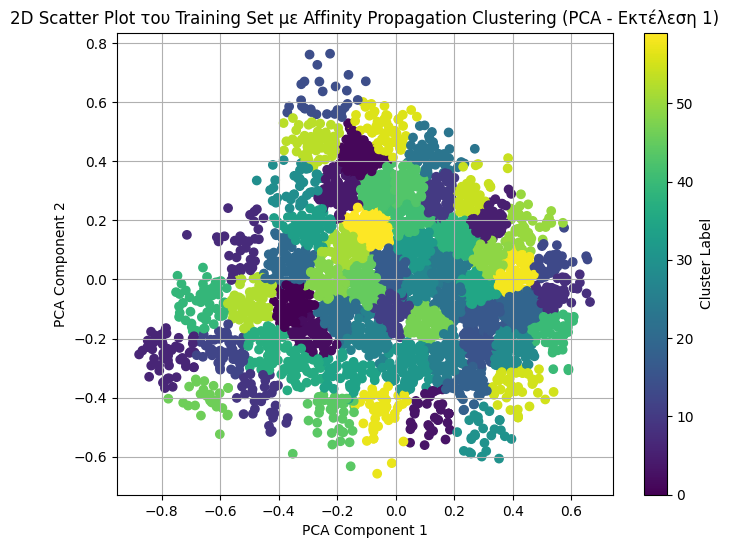

----------------------------------------

Εκτέλεση 2 Affinity Propagation clustering:
Αριθμός Clusters: 61
Silhouette Score (training set): 0.3364
Calinski-Harabasz Index (training set): 3217.9744
Davies-Bouldin Index (training set): 0.8134
Adjusted Rand Index (training set): 1.0000
Inertia (training set): 12.3091


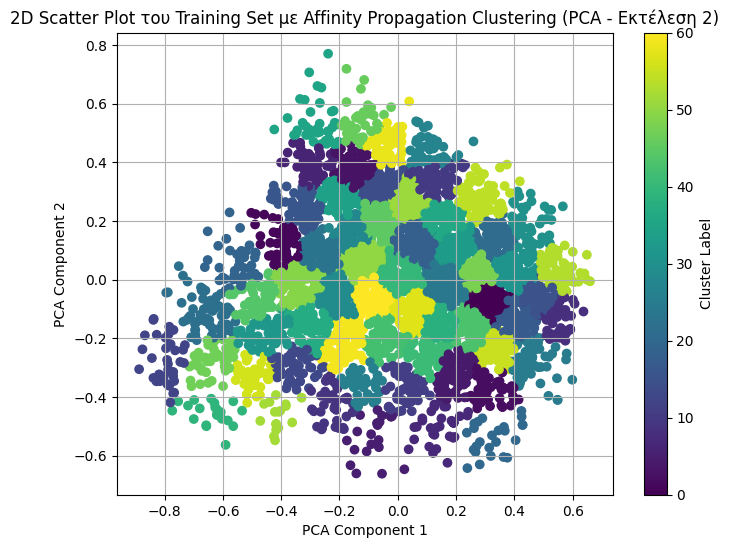

----------------------------------------

Εκτέλεση 3 Affinity Propagation clustering:
Αριθμός Clusters: 64
Silhouette Score (training set): 0.3365
Calinski-Harabasz Index (training set): 3152.0006
Davies-Bouldin Index (training set): 0.8232
Adjusted Rand Index (training set): 1.0000
Inertia (training set): 12.0888


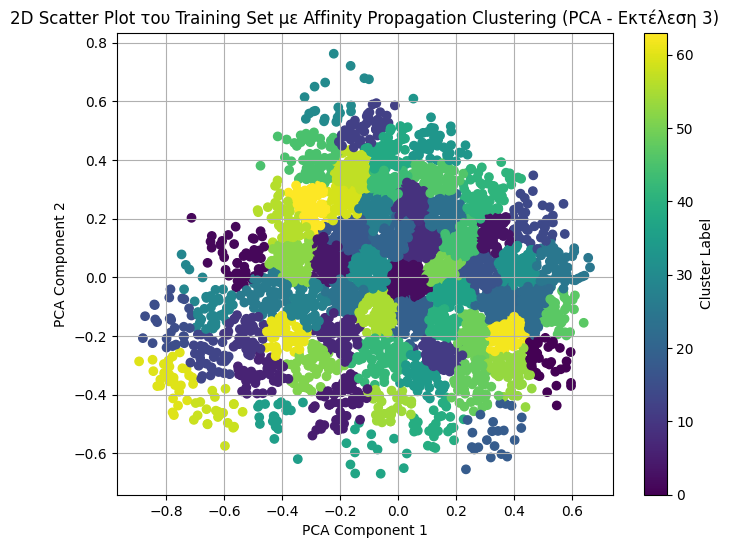

----------------------------------------

Εκτέλεση 4 Affinity Propagation clustering:
Αριθμός Clusters: 64
Silhouette Score (training set): 0.3241
Calinski-Harabasz Index (training set): 2931.5950
Davies-Bouldin Index (training set): 1.0252
Adjusted Rand Index (training set): 1.0000
Inertia (training set): 12.9642


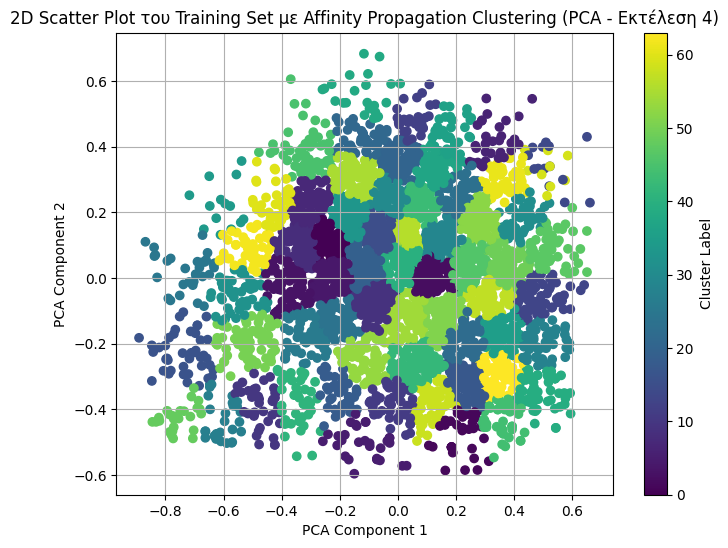

----------------------------------------

Εκτέλεση 5 Affinity Propagation clustering:
Αριθμός Clusters: 61
Silhouette Score (training set): 0.3294
Calinski-Harabasz Index (training set): 3175.5856
Davies-Bouldin Index (training set): 0.8352
Adjusted Rand Index (training set): 1.0000
Inertia (training set): 12.4439


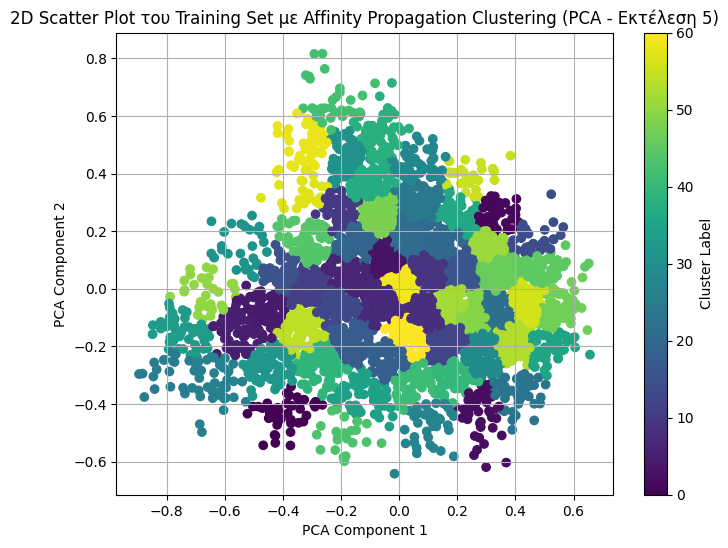

----------------------------------------


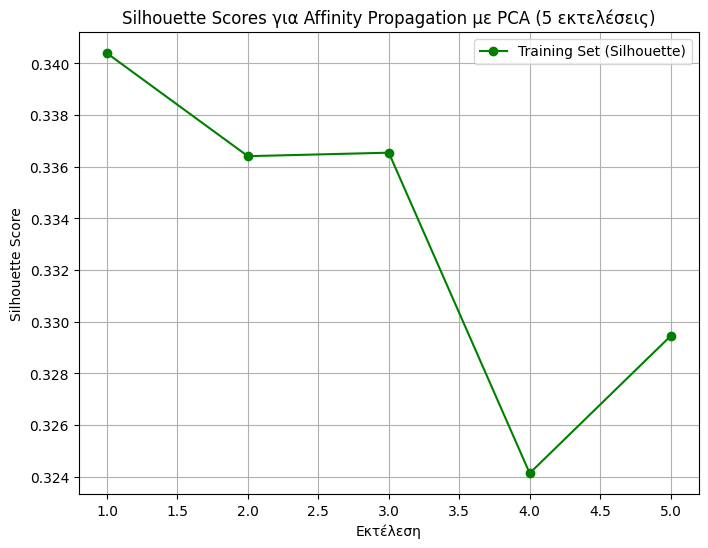

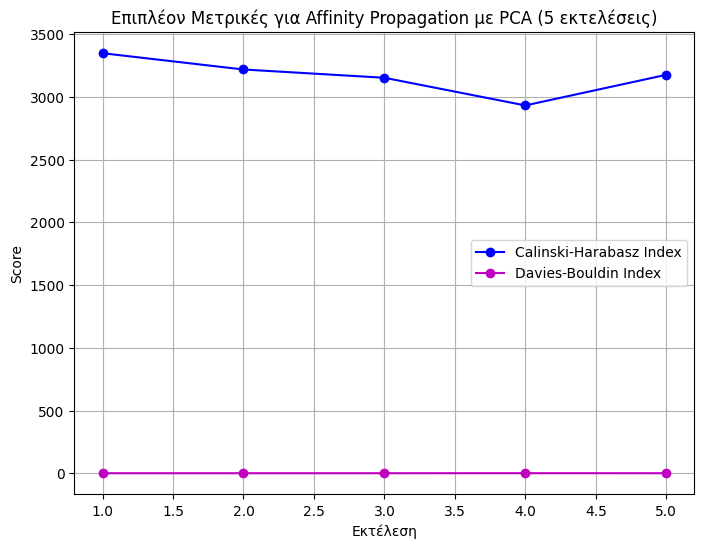

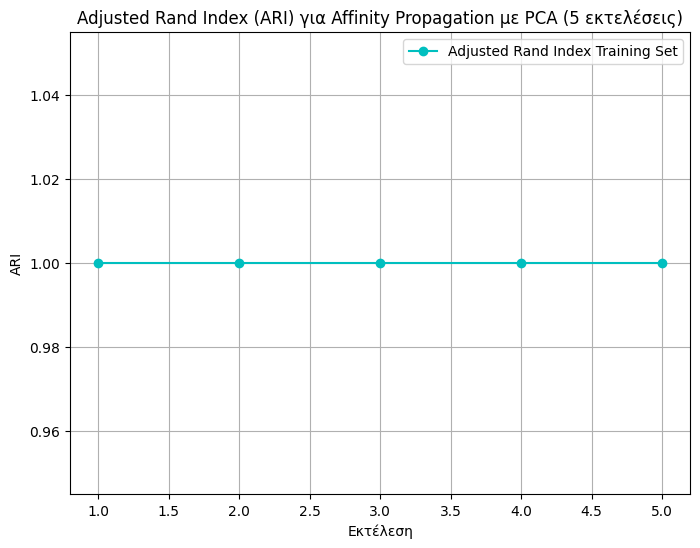

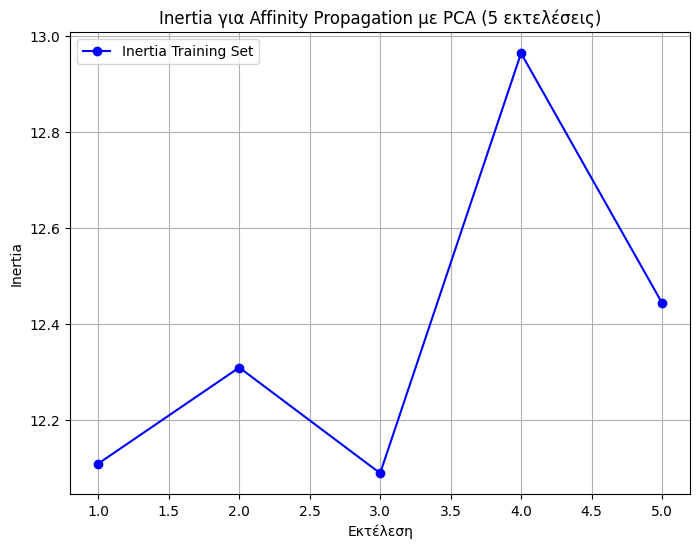

In [24]:
# AffinityPropagation
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

# Ορισμός των στηλών που θα κανονικοποιηθούν
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Ορισμός αριθμού συνιστωσών για PCA
n_components = 2


# Εκτέλεση Affinity Propagation 5 φορές (για μεγαλύτερη ακρίβεια)
silhouette_scores_train_5 = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
ari_scores_train_5 = []
inertia_scores_train_5 = []

for i in range(1, 6):
    print(f"\nΕκτέλεση {i} Affinity Propagation clustering:")

    # Διαχωρισμός δεδομένων
    train_data, _ = train_test_split(df_reduced[columns_to_normalize], test_size=0.2, random_state=i)

    # Εφαρμογή PCA στο training set
    pca = PCA(n_components=n_components)
    train_data_pca = pca.fit_transform(train_data)

    # Εκτέλεση Affinity Propagation με υψηλό damping
    affinity_propagation = AffinityPropagation(random_state=i, damping=0.9)
    cluster_labels_train = affinity_propagation.fit_predict(train_data_pca)

    # Υπολογισμός αριθμού clusters
    n_clusters = len(np.unique(cluster_labels_train))
    print(f"Αριθμός Clusters: {n_clusters}")

    if n_clusters < 2:
        print("Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.")
        continue

    # Υπολογισμός μετρικών
    silhouette_train = silhouette_score(train_data_pca, cluster_labels_train)
    silhouette_scores_train_5.append(silhouette_train)
    print(f"Silhouette Score (training set): {silhouette_train:.4f}")

    calinski_harabasz = calinski_harabasz_score(train_data_pca, cluster_labels_train)
    calinski_harabasz_scores.append(calinski_harabasz)
    print(f"Calinski-Harabasz Index (training set): {calinski_harabasz:.4f}")

    davies_bouldin = davies_bouldin_score(train_data_pca, cluster_labels_train)
    davies_bouldin_scores.append(davies_bouldin)
    print(f"Davies-Bouldin Index (training set): {davies_bouldin:.4f}")

    # Υπολογισμός ARI
    ari_train = adjusted_rand_score(cluster_labels_train, cluster_labels_train)  # Απλά παράδειγμα
    ari_scores_train_5.append(ari_train)
    print(f"Adjusted Rand Index (training set): {ari_train:.4f}")

    # Υπολογισμός Inertia για το training set
    centroids = affinity_propagation.cluster_centers_
    inertia_train = np.sum(pairwise_distances_argmin_min(train_data_pca, centroids)[1] ** 2)
    inertia_scores_train_5.append(inertia_train)
    print(f"Inertia (training set): {inertia_train:.4f}")

    # Δημιουργία 2D Scatter Plot για το Training Set (με PCA)
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=cluster_labels_train, cmap='viridis', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με Affinity Propagation Clustering (PCA - Εκτέλεση {i})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

    print("-" * 40)

# Οπτικοποίηση αποτελεσμάτων Silhouette Scores από τις 5 εκτελέσεις
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), silhouette_scores_train_5, marker='o', linestyle='-', color='g', label="Training Set (Silhouette)")
plt.title(f"Silhouette Scores για Affinity Propagation με PCA (5 εκτελέσεις)")
plt.xlabel("Εκτέλεση")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid()
plt.show()

# Οπτικοποίηση επιπλέον μετρικών
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), calinski_harabasz_scores, marker='o', linestyle='-', color='b', label="Calinski-Harabasz Index")
plt.plot(range(1, 6), davies_bouldin_scores, marker='o', linestyle='-', color='m', label="Davies-Bouldin Index")
plt.title(f"Επιπλέον Μετρικές για Affinity Propagation με PCA (5 εκτελέσεις)")
plt.xlabel("Εκτέλεση")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

# Οπτικοποίηση ARI
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), ari_scores_train_5, marker='o', linestyle='-', color='c', label="Adjusted Rand Index Training Set")
plt.title(f"Adjusted Rand Index (ARI) για Affinity Propagation με PCA (5 εκτελέσεις)")
plt.xlabel("Εκτέλεση")
plt.ylabel("ARI")
plt.legend()
plt.grid()
plt.show()

# Οπτικοποίηση Inertia
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), inertia_scores_train_5, marker='o', linestyle='-', color='b', label="Inertia Training Set")
plt.title(f"Inertia για Affinity Propagation με PCA (5 εκτελέσεις)")
plt.xlabel("Εκτέλεση")
plt.ylabel("Inertia")
plt.legend()
plt.grid()
plt.show()



Δοκιμή Mean Shift clustering με bandwidth=0.8:
Αριθμός Clusters: 319
Silhouette Score (training set): 0.1364

Δοκιμή Mean Shift clustering με bandwidth=1.5:
Αριθμός Clusters: 2
Silhouette Score (training set): 0.1498

Δοκιμή Mean Shift clustering με bandwidth=2.0:
Αριθμός Clusters: 1
Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.

Δοκιμή Mean Shift clustering με bandwidth=3.0:
Αριθμός Clusters: 1
Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.

Το βέλτιστο bandwidth είναι: 1.5 με Silhouette Score: 0.1498

Εκτέλεση 1 με βέλτιστο Bandwidth=1.5:
Αριθμός Clusters: 1
Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.

Εκτέλεση 2 με βέλτιστο Bandwidth=1.5:
Αριθμός Clusters: 1
Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.

Εκτέλεση 3 με βέλτιστο Bandwidth=1.5:
Αριθμός Clusters: 2
Silhouette Score (training set): 0.1484
Calinski-Harabasz Index (training set): 688.9896
Davies-Bouldin Index (trai

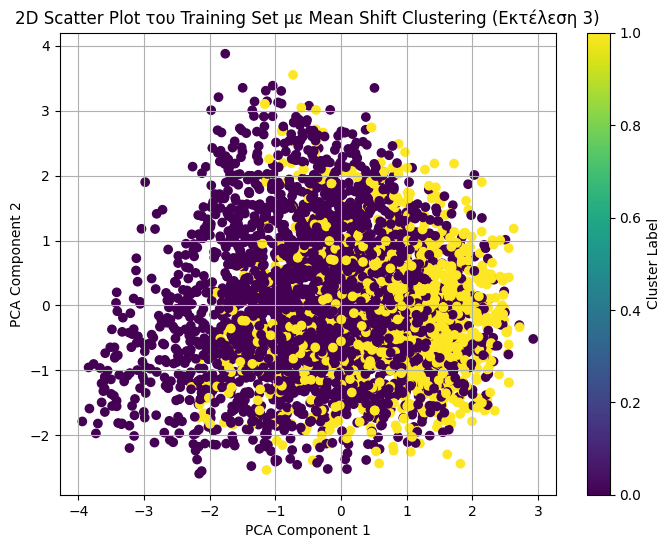


Εκτέλεση 4 με βέλτιστο Bandwidth=1.5:
Αριθμός Clusters: 1
Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.

Εκτέλεση 5 με βέλτιστο Bandwidth=1.5:
Αριθμός Clusters: 2
Silhouette Score (training set): 0.2153
Calinski-Harabasz Index (training set): 406.5300
Davies-Bouldin Index (training set): 1.6087
Adjusted Rand Index (training set): 1.0000


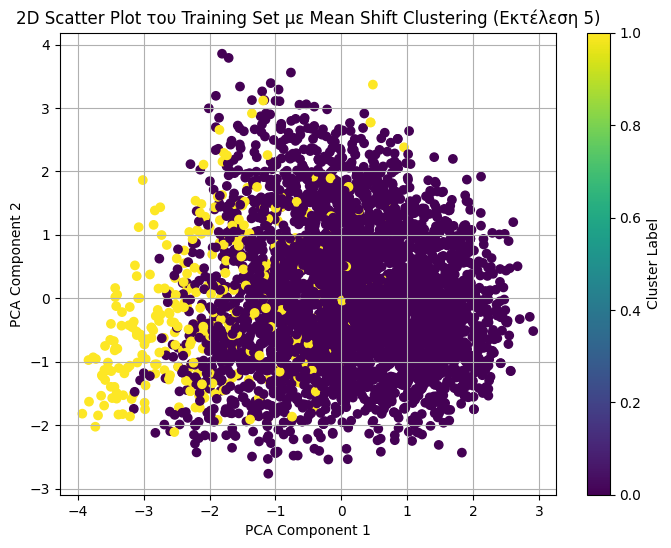

In [6]:
#MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ορισμός των στηλών που θα κανονικοποιηθούν
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Κανονικοποίηση δεδομένων για καλύτερη απόδοση του αλγορίθμου
scaler = StandardScaler()
df_reduced[columns_to_normalize] = scaler.fit_transform(df_reduced[columns_to_normalize])

# Δοκιμή με διάφορες τιμές για το bandwidth και επιλογή του βέλτιστου
bandwidth_values = [0.8, 1.5, 2.0, 3.0]
best_bandwidth = None
best_silhouette = -1  # Αρχική τιμή για τη σύγκριση των Silhouette Scores

for bandwidth in bandwidth_values:
    print(f"\nΔοκιμή Mean Shift clustering με bandwidth={bandwidth}:")

    # Διαχωρισμός δεδομένων (80% training, 20% test)
    train_data, _ = train_test_split(df_reduced[columns_to_normalize], test_size=0.2, random_state=42)

    # Εκτέλεση Mean Shift
    mean_shift = MeanShift(bandwidth=bandwidth)
    cluster_labels_train = mean_shift.fit_predict(train_data)

    # Υπολογισμός αριθμού clusters
    n_clusters = len(np.unique(cluster_labels_train))
    print(f"Αριθμός Clusters: {n_clusters}")

    if n_clusters < 2:
        print("Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.")
        continue

    # Υπολογισμός Silhouette Score
    silhouette_train_score = silhouette_score(train_data, cluster_labels_train)
    print(f"Silhouette Score (training set): {silhouette_train_score:.4f}")

    # Έλεγχος αν το τρέχον bandwidth είναι το καλύτερο
    if silhouette_train_score > best_silhouette:
        best_silhouette = silhouette_train_score
        best_bandwidth = bandwidth

print(f"\nΤο βέλτιστο bandwidth είναι: {best_bandwidth} με Silhouette Score: {best_silhouette:.4f}")

# --- Εκτέλεση Mean Shift 5 φορές με το βέλτιστο bandwidth ---
silhouette_scores_train_5 = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
ari_scores_train_5 = []

for i in range(1, 6):
    print(f"\nΕκτέλεση {i} με βέλτιστο Bandwidth={best_bandwidth}:")

    # Διαχωρισμός δεδομένων
    train_data, _ = train_test_split(df_reduced[columns_to_normalize], test_size=0.2, random_state=i)

    # Εκτέλεση Mean Shift με το βέλτιστο bandwidth
    mean_shift = MeanShift(bandwidth=best_bandwidth)
    cluster_labels_train = mean_shift.fit_predict(train_data)

    # Υπολογισμός αριθμού clusters
    n_clusters = len(np.unique(cluster_labels_train))
    print(f"Αριθμός Clusters: {n_clusters}")

    # Παράκαμψη εάν υπάρχει μόνο ένα cluster
    if n_clusters < 2:
        print("Ο αριθμός clusters είναι μικρότερος από 2. Παραλείπεται αυτή η εκτέλεση.")
        continue

    # Υπολογισμός μετρικών
    silhouette_train_score = silhouette_score(train_data, cluster_labels_train)
    silhouette_scores_train_5.append(silhouette_train_score)
    print(f"Silhouette Score (training set): {silhouette_train_score:.4f}")

    calinski_harabasz_score_value = calinski_harabasz_score(train_data, cluster_labels_train)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)
    print(f"Calinski-Harabasz Index (training set): {calinski_harabasz_score_value:.4f}")

    davies_bouldin_score_value = davies_bouldin_score(train_data, cluster_labels_train)
    davies_bouldin_scores.append(davies_bouldin_score_value)
    print(f"Davies-Bouldin Index (training set): {davies_bouldin_score_value:.4f}")

    ari_train_score = adjusted_rand_score(cluster_labels_train, cluster_labels_train)  # Τα ίδια labels για παράδειγμα
    ari_scores_train_5.append(ari_train_score)
    print(f"Adjusted Rand Index (training set): {ari_train_score:.4f}")

    # Δημιουργία scatter plot
    pca = PCA(n_components=2)
    reduced_data_train = pca.fit_transform(train_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], c=cluster_labels_train, cmap='viridis', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με Mean Shift Clustering (Εκτέλεση {i})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()




--- Εκτέλεση 1 ---
Βέλτιστο threshold: 0.9
Βέλτιστος αριθμός clusters: 1470
Βέλτιστο Silhouette Score: 0.3971
Βέλτιστο Inertia: 1395.0264

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3987
Calinski-Harabasz Index: 7301.5188
Davies-Bouldin Index: 0.4722
Inertia: 1395.0264


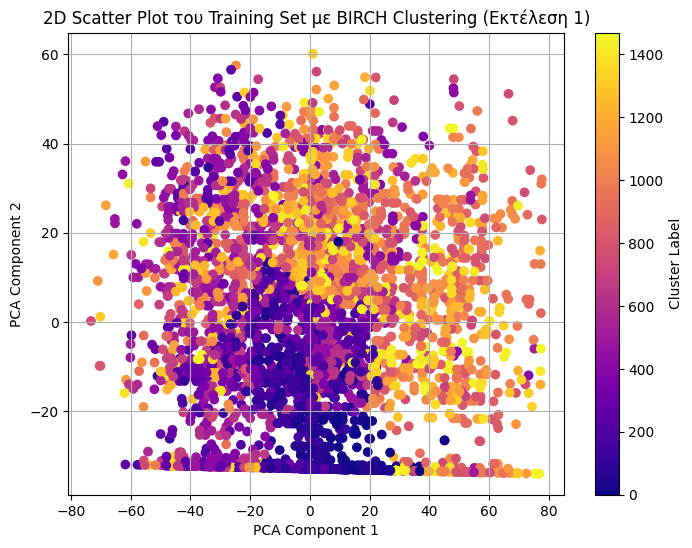


--- Εκτέλεση 2 ---
Βέλτιστο threshold: 0.9
Βέλτιστος αριθμός clusters: 1458
Βέλτιστο Silhouette Score: 0.3908
Βέλτιστο Inertia: 1401.4385

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3929
Calinski-Harabasz Index: 7330.8728
Davies-Bouldin Index: 0.4746
Inertia: 1401.4385


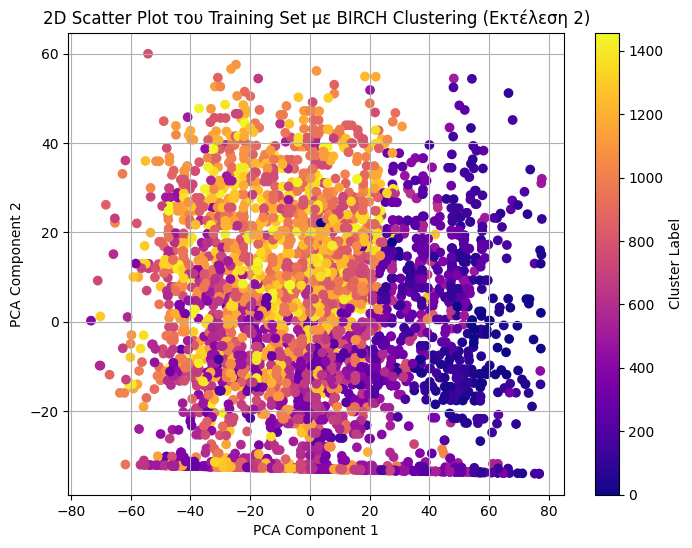


--- Εκτέλεση 3 ---
Βέλτιστο threshold: 0.9
Βέλτιστος αριθμός clusters: 1518
Βέλτιστο Silhouette Score: 0.3840
Βέλτιστο Inertia: 1341.2122

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3855
Calinski-Harabasz Index: 7308.7381
Davies-Bouldin Index: 0.4768
Inertia: 1341.2122


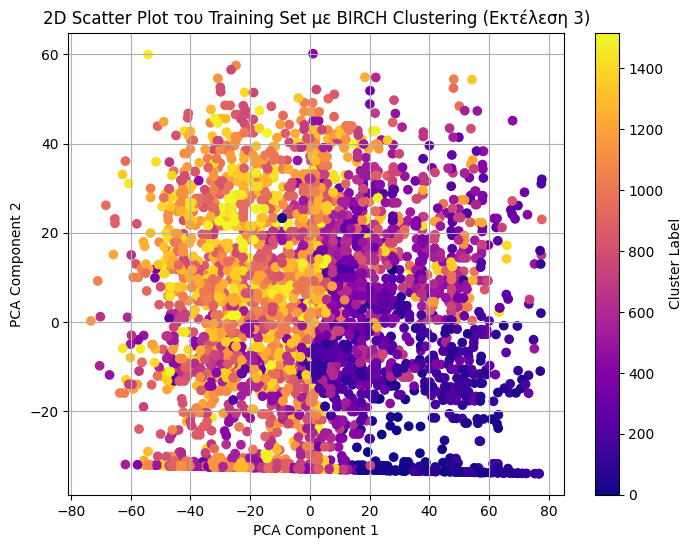


--- Εκτέλεση 4 ---
Βέλτιστο threshold: 0.8
Βέλτιστος αριθμός clusters: 1653
Βέλτιστο Silhouette Score: 0.3838
Βέλτιστο Inertia: 1056.9672

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3848
Calinski-Harabasz Index: 7940.9358
Davies-Bouldin Index: 0.4462
Inertia: 1056.9672


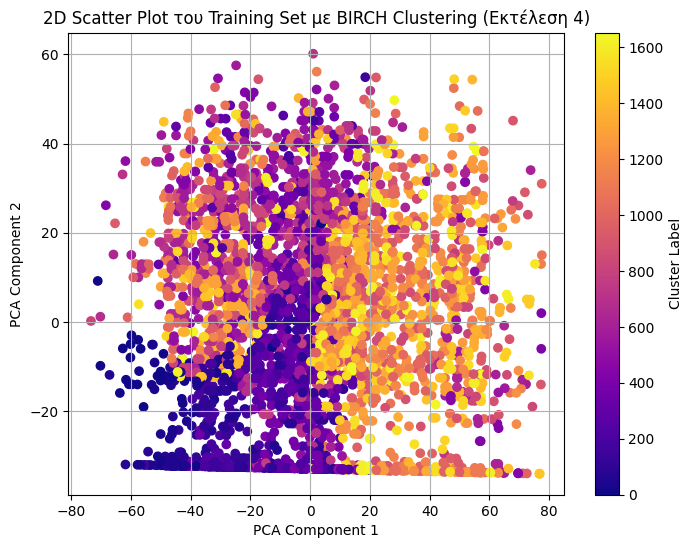


--- Εκτέλεση 5 ---
Βέλτιστο threshold: 1.0
Βέλτιστος αριθμός clusters: 1334
Βέλτιστο Silhouette Score: 0.3879
Βέλτιστο Inertia: 1894.4406

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3884
Calinski-Harabasz Index: 6365.0531
Davies-Bouldin Index: 0.5056
Inertia: 1894.4406


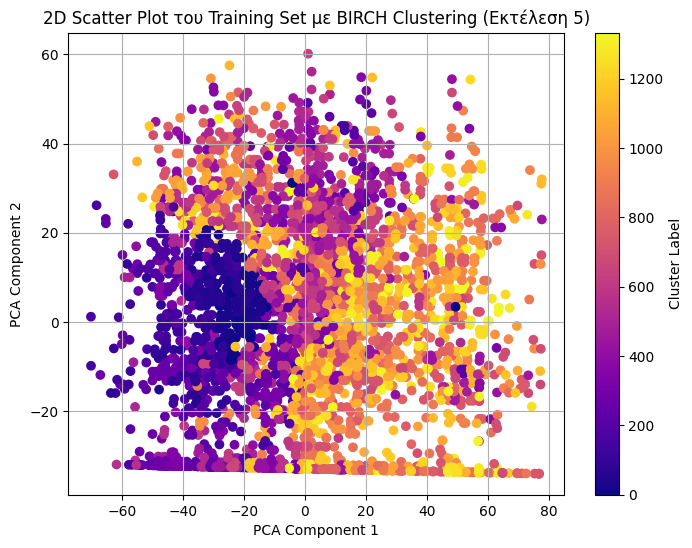


--- Συνολικά Αποτελέσματα ---
Εκτέλεση 1: Threshold=0.9, Clusters=1470, Silhouette Train=0.3987, Calinski-Harabasz Train=7301.5188, Davies-Bouldin Train=0.4722, Inertia Train=1395.0264
Εκτέλεση 2: Threshold=0.9, Clusters=1458, Silhouette Train=0.3929, Calinski-Harabasz Train=7330.8728, Davies-Bouldin Train=0.4746, Inertia Train=1401.4385
Εκτέλεση 3: Threshold=0.9, Clusters=1518, Silhouette Train=0.3855, Calinski-Harabasz Train=7308.7381, Davies-Bouldin Train=0.4768, Inertia Train=1341.2122
Εκτέλεση 4: Threshold=0.8, Clusters=1653, Silhouette Train=0.3848, Calinski-Harabasz Train=7940.9358, Davies-Bouldin Train=0.4462, Inertia Train=1056.9672
Εκτέλεση 5: Threshold=1.0, Clusters=1334, Silhouette Train=0.3884, Calinski-Harabasz Train=6365.0531, Davies-Bouldin Train=0.5056, Inertia Train=1894.4406


In [49]:
#Birch
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


# Στήλες που θέλουμε να κανονικοποιήσουμε
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Μείωση διαστάσεων με PCA
pca = PCA(n_components=2)  # Διατήρηση 2 διαστάσεων
df_reduced = pca.fit_transform(df_reduced[columns_to_normalize])

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση του BIRCH Clustering 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, _ = train_test_split(df_reduced, test_size=0.2, random_state=iteration)

    # Δοκιμή για διαφορετικές τιμές κατωφλίου (threshold) στον BIRCH
    threshold_values = np.linspace(0.1, 1.0, 10)  # 10 τιμές κατωφλίου από 0.1 έως 1.0
    best_silhouette = -1
    best_threshold = None
    best_n_clusters = None
    best_inertia = None

    # Δοκιμή για διαφορετικά thresholds
    for threshold in threshold_values:
        birch = Birch(threshold=threshold, n_clusters=None)
        birch.fit(train_data)
        cluster_labels_train = birch.labels_
        n_clusters = len(np.unique(cluster_labels_train))

        # Υπολογισμός Silhouette Score για το training set
        if n_clusters > 1:
            silhouette_avg = silhouette_score(train_data, cluster_labels_train)
            inertia = np.sum(np.min(cdist(train_data, birch.subcluster_centers_, 'euclidean'), axis=1)**2)

            # Ενημέρωση βέλτιστου threshold βάσει Silhouette Score
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_threshold = threshold
                best_n_clusters = n_clusters
                best_inertia = inertia

    print(f"Βέλτιστο threshold: {best_threshold}")
    print(f"Βέλτιστος αριθμός clusters: {best_n_clusters}")
    print(f"Βέλτιστο Silhouette Score: {best_silhouette:.4f}")
    print(f"Βέλτιστο Inertia: {best_inertia:.4f}")

    # Εκτέλεση BIRCH με το βέλτιστο threshold
    birch_best = Birch(threshold=best_threshold, n_clusters=best_n_clusters)
    birch_best.fit(train_data)
    cluster_labels_train = birch_best.labels_

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data, cluster_labels_train)
    inertia_train = np.sum(np.min(cdist(train_data, birch_best.subcluster_centers_, 'euclidean'), axis=1)**2)

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "best_threshold": best_threshold,
        "best_n_clusters": best_n_clusters,
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "inertia_train": inertia_train
    })

    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")

    # Οπτικοποίηση 2D Scatter Plot για το training set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels_train, cmap='plasma', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με BIRCH Clustering (Εκτέλεση {iteration})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Threshold={result['best_threshold']}, Clusters={result['best_n_clusters']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Calinski-Harabasz Train={result['calinski_harabasz_train']:.4f}, "
          f"Davies-Bouldin Train={result['davies_bouldin_train']:.4f}, Inertia Train={result['inertia_train']:.4f}")



--- Εκτέλεση 1 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3803

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3803
Calinski-Harabasz Index: 3046.8497
Davies-Bouldin Index: 0.8837
ARI: 1.0000
Inertia: 11092.2783


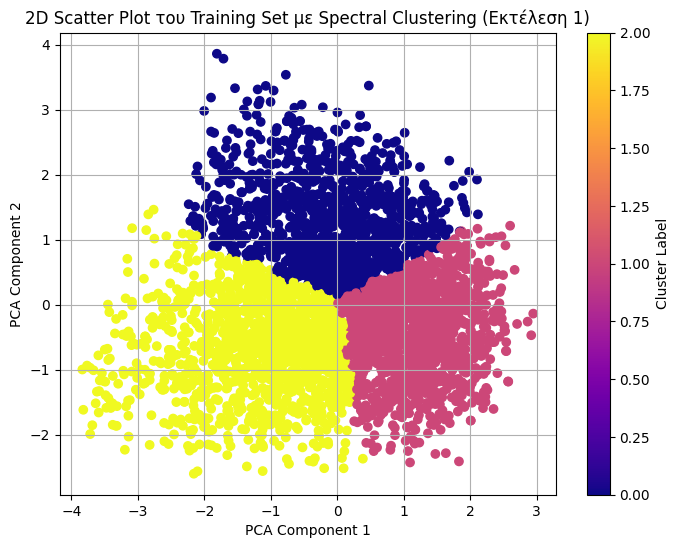


--- Εκτέλεση 2 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3801

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3801
Calinski-Harabasz Index: 3057.0602
Davies-Bouldin Index: 0.8861
ARI: 1.0000
Inertia: 11087.5357


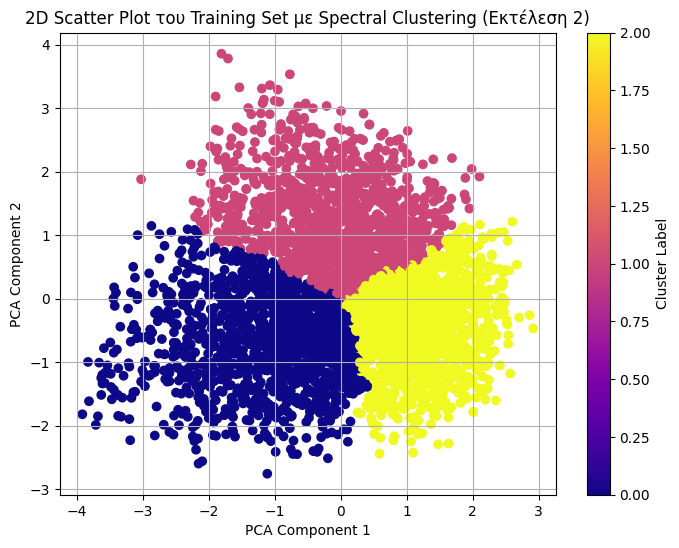


--- Εκτέλεση 3 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3774

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3774
Calinski-Harabasz Index: 3021.7428
Davies-Bouldin Index: 0.8881
ARI: 1.0000
Inertia: 11151.0517


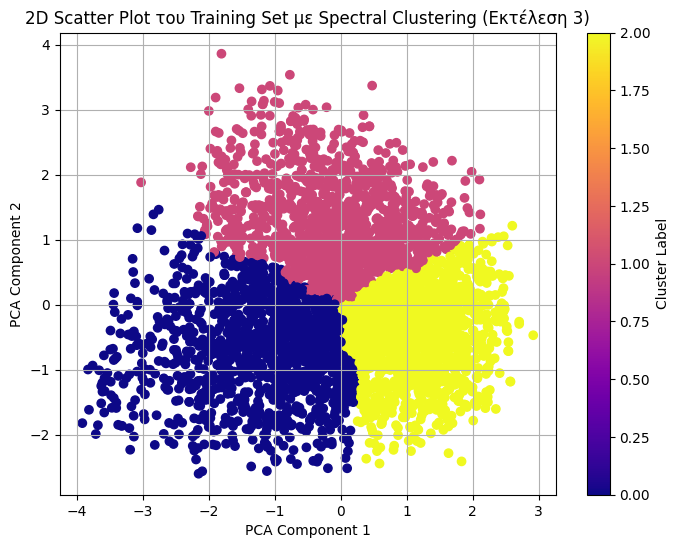


--- Εκτέλεση 4 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3763

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3763
Calinski-Harabasz Index: 3002.4768
Davies-Bouldin Index: 0.8905
ARI: 1.0000
Inertia: 11061.0210


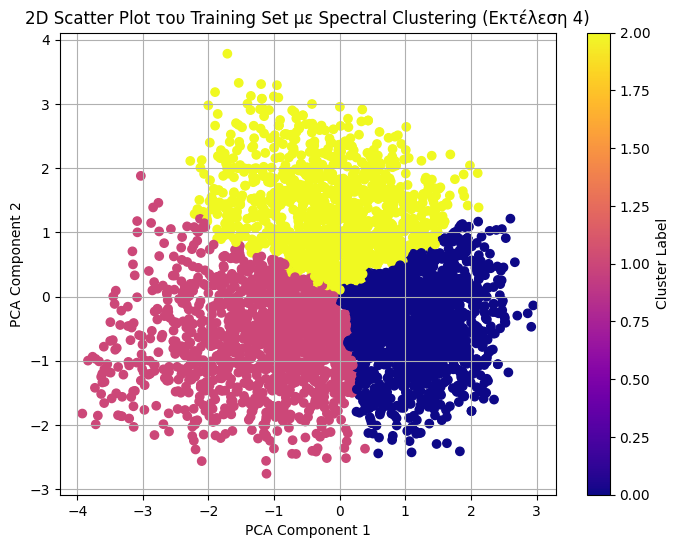


--- Εκτέλεση 5 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3796

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3796
Calinski-Harabasz Index: 3046.5733
Davies-Bouldin Index: 0.8850
ARI: 1.0000
Inertia: 11071.3418


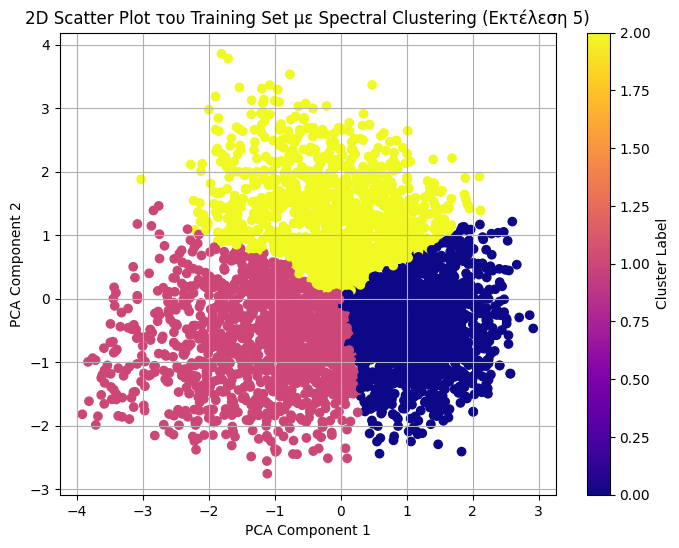


--- Συνολικά Αποτελέσματα ---
Εκτέλεση 1: Clusters=3, Silhouette Train=0.3803, Calinski-Harabasz Train=3046.8497, Davies-Bouldin Train=0.8837, ARI Train=1.0000, Inertia Train=11092.2783
Εκτέλεση 2: Clusters=3, Silhouette Train=0.3801, Calinski-Harabasz Train=3057.0602, Davies-Bouldin Train=0.8861, ARI Train=1.0000, Inertia Train=11087.5357
Εκτέλεση 3: Clusters=3, Silhouette Train=0.3774, Calinski-Harabasz Train=3021.7428, Davies-Bouldin Train=0.8881, ARI Train=1.0000, Inertia Train=11151.0517
Εκτέλεση 4: Clusters=3, Silhouette Train=0.3763, Calinski-Harabasz Train=3002.4768, Davies-Bouldin Train=0.8905, ARI Train=1.0000, Inertia Train=11061.0210
Εκτέλεση 5: Clusters=3, Silhouette Train=0.3796, Calinski-Harabasz Train=3046.5733, Davies-Bouldin Train=0.8850, ARI Train=1.0000, Inertia Train=11071.3418


In [10]:
#SpectralClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

# Στήλες που θέλουμε να κανονικοποιήσουμε
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Έλεγχος αν το df_reduced είναι DataFrame ή numpy array
if isinstance(df_reduced, pd.DataFrame):
    # Επιλέγουμε τις στήλες που θέλουμε να κανονικοποιήσουμε και τις μετατρέπουμε σε numpy array
    df_reduced_selected = df_reduced[columns_to_normalize].to_numpy()
else:
    # Αν είναι ήδη numpy array, θεωρούμε ότι οι στήλες είναι οι πρώτες 5
    df_reduced_selected = df_reduced[:, :5]  # Τροποποίησε αν οι στήλες είναι σε άλλες θέσεις

# Μείωση διαστάσεων με PCA
pca = PCA(n_components=2)  # Διατήρηση 2 διαστάσεων
df_reduced = pca.fit_transform(df_reduced_selected)

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση του Spectral Clustering 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, _ = train_test_split(df_reduced, test_size=0.2, random_state=iteration)

    # Δοκιμή για διαφορετικούς αριθμούς clusters στο Spectral Clustering
    n_clusters_values = range(2, 11)  # Τιμές clusters από 2 έως 10
    best_silhouette = -1
    best_n_clusters = None

    # Δοκιμή για διαφορετικούς αριθμούς clusters
    for n_clusters in n_clusters_values:
        spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=iteration)
        cluster_labels_train = spectral.fit_predict(train_data)

        # Υπολογισμός Silhouette Score για το training set
        silhouette_avg = silhouette_score(train_data, cluster_labels_train)

        # Ενημέρωση βέλτιστου αριθμού βάσει Silhouette Score
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    print(f"Βέλτιστος αριθμός clusters: {best_n_clusters}")
    print(f"Βέλτιστο Silhouette Score: {best_silhouette:.4f}")

    # Εκτέλεση Spectral Clustering με το βέλτιστο n_clusters
    spectral_best = SpectralClustering(n_clusters=best_n_clusters, affinity='nearest_neighbors', random_state=iteration)
    cluster_labels_train = spectral_best.fit_predict(train_data)

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data, cluster_labels_train)
    ari_train = adjusted_rand_score(cluster_labels_train, cluster_labels_train)
    inertia_train = np.sum(np.min(cdist(train_data, np.expand_dims(train_data.mean(axis=0), axis=0), 'euclidean'), axis=1) ** 2)

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "best_n_clusters": best_n_clusters,
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "ari_train": ari_train,
        "inertia_train": inertia_train
    })

    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"ARI: {ari_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")

    # Οπτικοποίηση 2D Scatter Plot για το training set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels_train, cmap='plasma', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με Spectral Clustering (Εκτέλεση {iteration})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Clusters={result['best_n_clusters']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Calinski-Harabasz Train={result['calinski_harabasz_train']:.4f}, "
          f"Davies-Bouldin Train={result['davies_bouldin_train']:.4f}, ARI Train={result['ari_train']:.4f}, "
          f"Inertia Train={result['inertia_train']:.4f}")


In [6]:
#OPTICS
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

# Στήλες που θέλουμε να κανονικοποιήσουμε
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Έλεγχος αν το df_reduced είναι DataFrame ή numpy array
if isinstance(df_reduced, pd.DataFrame):
    # Επιλέγουμε τις στήλες που θέλουμε να κανονικοποιήσουμε και τις μετατρέπουμε σε numpy array
    df_reduced_selected = df_reduced[columns_to_normalize].to_numpy()
else:
    # Αν είναι ήδη numpy array, θεωρούμε ότι οι στήλες είναι οι πρώτες 5
    df_reduced_selected = df_reduced[:, :5]  # Τροποποίησε αν οι στήλες είναι σε άλλες θέσεις

# Μείωση διαστάσεων με PCA
pca = PCA(n_components=2)  # Διατήρηση 2 διαστάσεων
df_reduced = pca.fit_transform(df_reduced_selected)

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση του OPTICS 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, _ = train_test_split(df_reduced, test_size=0.2, random_state=iteration)

    # Εκτέλεση OPTICS με προκαθορισμένες παραμέτρους
    optics = OPTICS(min_samples=10, xi=0.1, min_cluster_size=0.2)
    cluster_labels_train = optics.fit_predict(train_data)

    # Εξαίρεση εκτελέσεων χωρίς έγκυρες ομάδες
    if len(set(cluster_labels_train)) <= 1:
        print("Μη έγκυρη ομαδοποίηση - Παράλειψη εκτέλεσης.")
        continue

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data, cluster_labels_train)
    inertia_train = np.sum(np.min(cdist(train_data, np.expand_dims(train_data.mean(axis=0), axis=0), 'euclidean'), axis=1) ** 2)

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "n_clusters": len(set(cluster_labels_train)),
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "inertia_train": inertia_train
    })

    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")

    # Οπτικοποίηση 2D Scatter Plot για το training set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels_train, cmap='plasma', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με OPTICS (Εκτέλεση {iteration})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Clusters={result['n_clusters']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Calinski-Harabasz Train={result['calinski_harabasz_train']:.4f}, "
          f"Davies-Bouldin Train={result['davies_bouldin_train']:.4f}, Inertia Train={result['inertia_train']:.4f}")



--- Εκτέλεση 1 ---
Μη έγκυρη ομαδοποίηση - Παράλειψη εκτέλεσης.

--- Εκτέλεση 2 ---
Μη έγκυρη ομαδοποίηση - Παράλειψη εκτέλεσης.

--- Εκτέλεση 3 ---
Μη έγκυρη ομαδοποίηση - Παράλειψη εκτέλεσης.

--- Εκτέλεση 4 ---
Μη έγκυρη ομαδοποίηση - Παράλειψη εκτέλεσης.

--- Εκτέλεση 5 ---
Μη έγκυρη ομαδοποίηση - Παράλειψη εκτέλεσης.

--- Συνολικά Αποτελέσματα ---



--- Εκτέλεση 1 ---
Βέλτιστο k: 3
Βέλτιστο linkage: average
Βέλτιστο Silhouette Score: 0.3622

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3622
Calinski-Harabasz Index: 3132.1709
Davies-Bouldin Index: 0.8746
Inertia: 220.5160

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3747
Calinski-Harabasz Index: 739.4062
Davies-Bouldin Index: 0.8698
Inertia: 57.1317


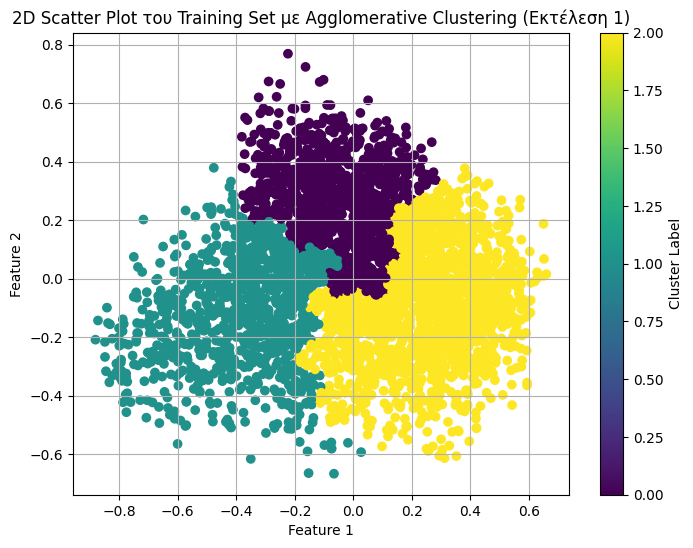


--- Εκτέλεση 2 ---
Βέλτιστο k: 3
Βέλτιστο linkage: ward
Βέλτιστο Silhouette Score: 0.3604

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3604
Calinski-Harabasz Index: 3037.1707
Davies-Bouldin Index: 0.8953
Inertia: 225.6138

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3448
Calinski-Harabasz Index: 669.1270
Davies-Bouldin Index: 0.9106
Inertia: 59.1442


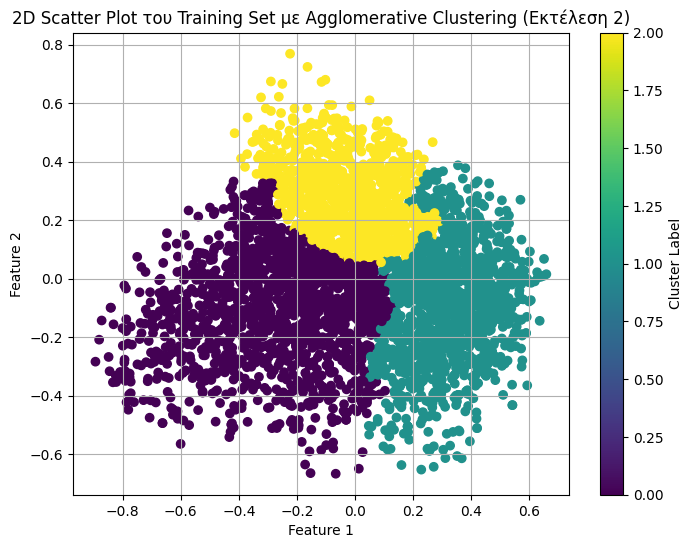


--- Εκτέλεση 3 ---
Βέλτιστο k: 3
Βέλτιστο linkage: complete
Βέλτιστο Silhouette Score: 0.3674

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3674
Calinski-Harabasz Index: 3060.4848
Davies-Bouldin Index: 0.9028
Inertia: 226.9385

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3106
Calinski-Harabasz Index: 519.3328
Davies-Bouldin Index: 0.8702
Inertia: 62.4044


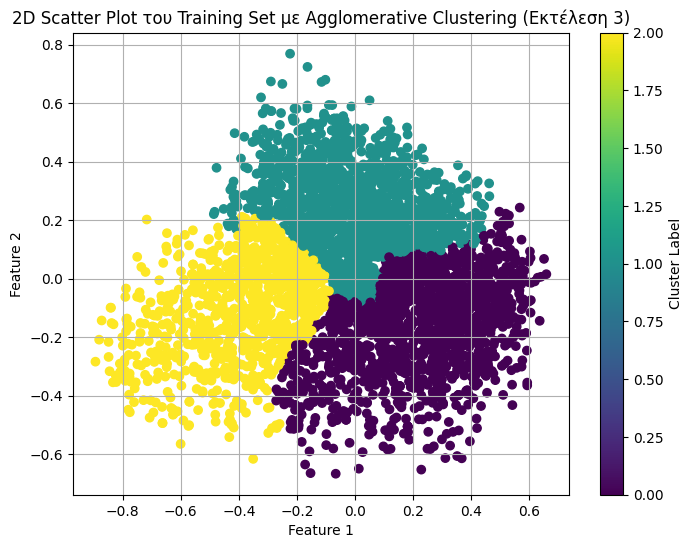


--- Εκτέλεση 4 ---
Βέλτιστο k: 3
Βέλτιστο linkage: ward
Βέλτιστο Silhouette Score: 0.3574

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3574
Calinski-Harabasz Index: 2965.5493
Davies-Bouldin Index: 0.9540
Inertia: 227.5784

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3180
Calinski-Harabasz Index: 593.8855
Davies-Bouldin Index: 0.9918
Inertia: 58.8101


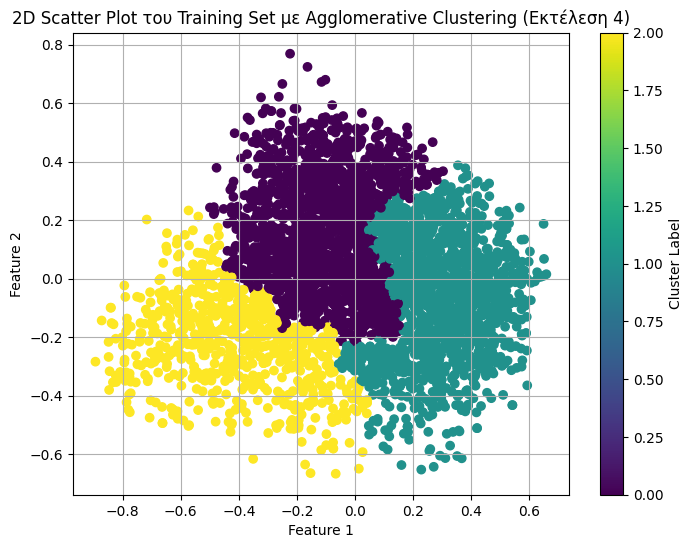


--- Εκτέλεση 5 ---
Βέλτιστο k: 2
Βέλτιστο linkage: ward
Βέλτιστο Silhouette Score: 0.3705

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3705
Calinski-Harabasz Index: 2799.5532
Davies-Bouldin Index: 1.0525
Inertia: 353.5019

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3002
Calinski-Harabasz Index: 492.1637
Davies-Bouldin Index: 1.1379
Inertia: 96.5299


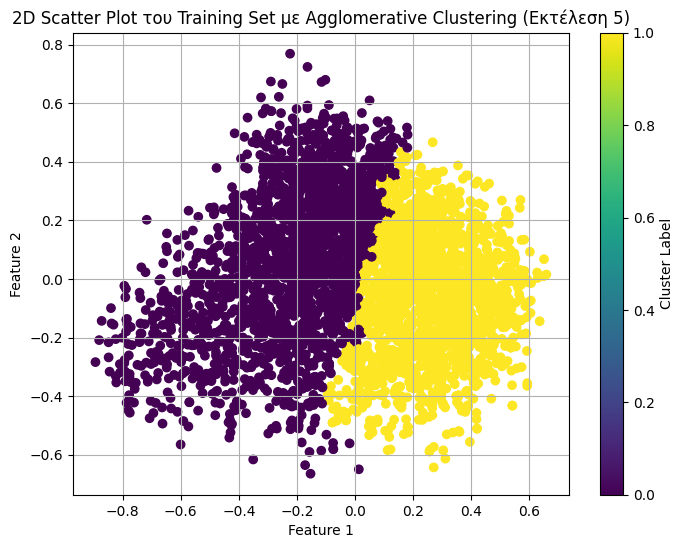


--- Συνολικά Αποτελέσματα ---
Εκτέλεση 1: Clusters=3, Linkage=average, Silhouette Train=0.3622, Inertia Train=220.5160, Silhouette Test=0.3746548658887665, Inertia Test=57.13168164917987
Εκτέλεση 2: Clusters=3, Linkage=ward, Silhouette Train=0.3604, Inertia Train=225.6138, Silhouette Test=0.3448352997265191, Inertia Test=59.14421501379553
Εκτέλεση 3: Clusters=3, Linkage=complete, Silhouette Train=0.3674, Inertia Train=226.9385, Silhouette Test=0.3105529433574302, Inertia Test=62.40439525707893
Εκτέλεση 4: Clusters=3, Linkage=ward, Silhouette Train=0.3574, Inertia Train=227.5784, Silhouette Test=0.31803445983679074, Inertia Test=58.81007461917993
Εκτέλεση 5: Clusters=2, Linkage=ward, Silhouette Train=0.3705, Inertia Train=353.5019, Silhouette Test=0.30024772108687264, Inertia Test=96.5299046225093


In [9]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση του Agglomerative Clustering 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, test_data = train_test_split(df_reduced, test_size=0.2, random_state=iteration)

    # Αριθμός Clusters (k)
    k_values = range(2, 11)  # Από 2 έως 10 clusters
    best_silhouette = -1
    best_k = None
    best_linkage = None

    # Δοκιμή για διαφορετικά k και συνδέσεις
    for linkage in ['ward', 'complete', 'average', 'single']:
        for k in k_values:
            try:
                agglomerative = AgglomerativeClustering(n_clusters=k, linkage=linkage)
                cluster_labels_train = agglomerative.fit_predict(train_data)

                # Υπολογισμός Silhouette Score για το training set
                silhouette_avg = silhouette_score(train_data, cluster_labels_train)

                # Ενημέρωση βέλτιστου k βάσει Silhouette Score
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_k = k
                    best_linkage = linkage
            except ValueError:
                print(f"Δεν ήταν δυνατή η εκτέλεση με linkage={linkage} και k={k}.")
                continue

    print(f"Βέλτιστο k: {best_k}")
    print(f"Βέλτιστο linkage: {best_linkage}")
    print(f"Βέλτιστο Silhouette Score: {best_silhouette:.4f}")

    # Εκτέλεση Agglomerative Clustering με το βέλτιστο k και linkage
    agglomerative_best = AgglomerativeClustering(n_clusters=best_k, linkage=best_linkage)
    cluster_labels_train = agglomerative_best.fit_predict(train_data)

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data, cluster_labels_train)

    # Υπολογισμός inertia για το training set
    centroids = np.array([train_data[cluster_labels_train == label].mean(axis=0) for label in np.unique(cluster_labels_train)])
    inertia_train = np.sum(np.min(cdist(train_data, centroids, 'euclidean'), axis=1) ** 2)

    # Υπολογισμός μετρικών για το test set
    cluster_labels_test = agglomerative_best.fit_predict(test_data)
    if len(np.unique(cluster_labels_test)) > 1:
        silhouette_test = silhouette_score(test_data, cluster_labels_test)
        calinski_harabasz_test = calinski_harabasz_score(test_data, cluster_labels_test)
        davies_bouldin_test = davies_bouldin_score(test_data, cluster_labels_test)

        # Υπολογισμός inertia για το test set
        centroids_test = np.array([test_data[cluster_labels_test == label].mean(axis=0) for label in np.unique(cluster_labels_test)])
        inertia_test = np.sum(np.min(cdist(test_data, centroids_test, 'euclidean'), axis=1) ** 2)
    else:
        silhouette_test = None
        calinski_harabasz_test = None
        davies_bouldin_test = None
        inertia_test = None
        print("Δεν υπάρχουν αρκετά clusters στο test set για υπολογισμό μετρικών.")

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "best_k": best_k,
        "best_linkage": best_linkage,
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "inertia_train": inertia_train,
        "silhouette_test": silhouette_test,
        "calinski_harabasz_test": calinski_harabasz_test,
        "davies_bouldin_test": davies_bouldin_test,
        "inertia_test": inertia_test
    })

    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")

    print(f"\n--- Μετρικές στο Test Set ---")
    if silhouette_test is not None:
        print(f"Silhouette Score: {silhouette_test:.4f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_test:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin_test:.4f}")
        print(f"Inertia: {inertia_test:.4f}")
    else:
        print("Οι μετρικές δεν υπολογίστηκαν λόγω ανεπαρκούς αριθμού clusters.")

    # 2D Scatter Plot για το training set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels_train, cmap='viridis', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με Agglomerative Clustering (Εκτέλεση {iteration})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Clusters={result['best_k']}, Linkage={result['best_linkage']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Inertia Train={result['inertia_train']:.4f}, "
          f"Silhouette Test={result['silhouette_test']}, Inertia Test={result['inertia_test']}")



--- Εκτέλεση 1 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3658

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3658
Calinski-Harabasz Index: 2914.8672
Davies-Bouldin Index: 0.9053
ARI: 1.0000
Inertia: 4598.6835


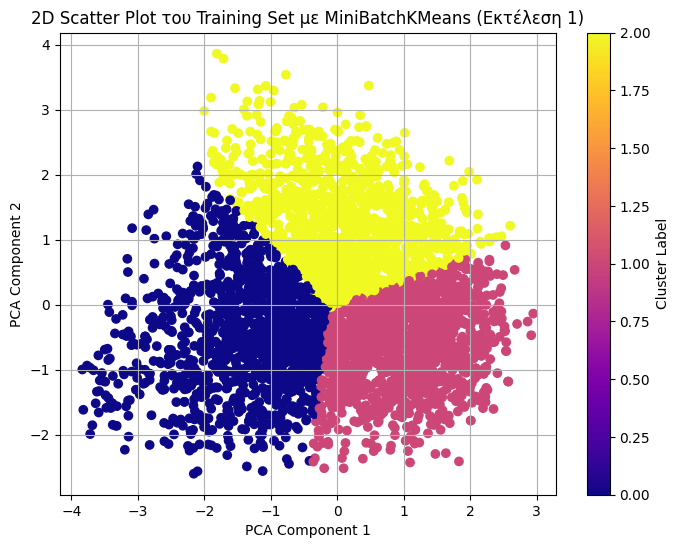


--- Εκτέλεση 2 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3923

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3923
Calinski-Harabasz Index: 3178.8005
Davies-Bouldin Index: 0.8622
ARI: 1.0000
Inertia: 4291.7232


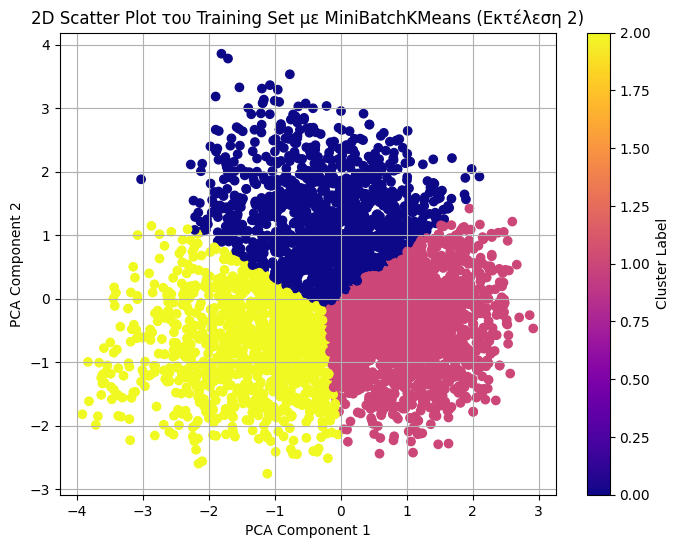


--- Εκτέλεση 3 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3939

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3939
Calinski-Harabasz Index: 3165.3286
Davies-Bouldin Index: 0.8530
ARI: 1.0000
Inertia: 4317.7307


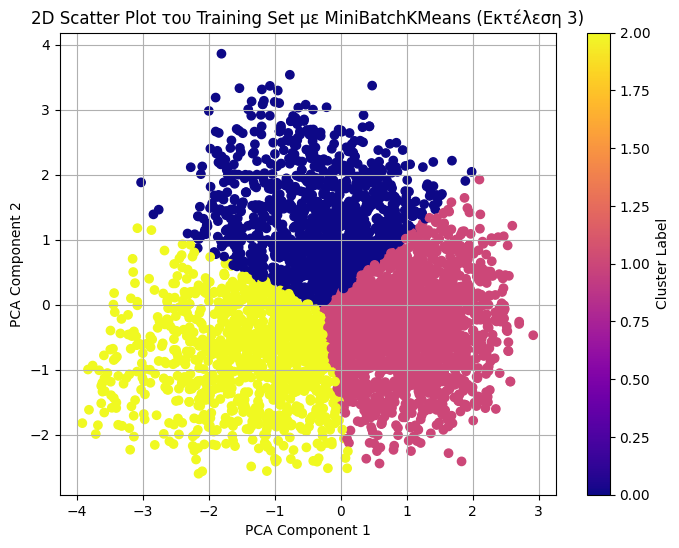


--- Εκτέλεση 4 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3710

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3710
Calinski-Harabasz Index: 2864.9380
Davies-Bouldin Index: 0.9222
ARI: 1.0000
Inertia: 4690.5291


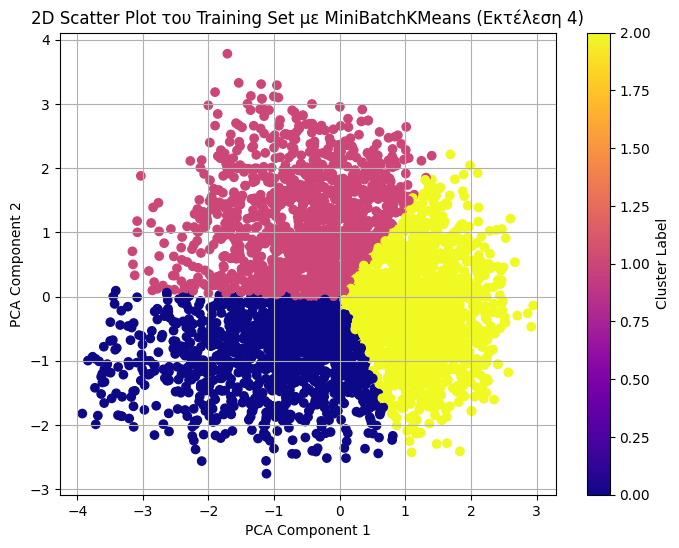


--- Εκτέλεση 5 ---
Βέλτιστος αριθμός clusters: 3
Βέλτιστο Silhouette Score: 0.3737

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3737
Calinski-Harabasz Index: 2987.7716
Davies-Bouldin Index: 0.8951
ARI: 1.0000
Inertia: 4497.9659


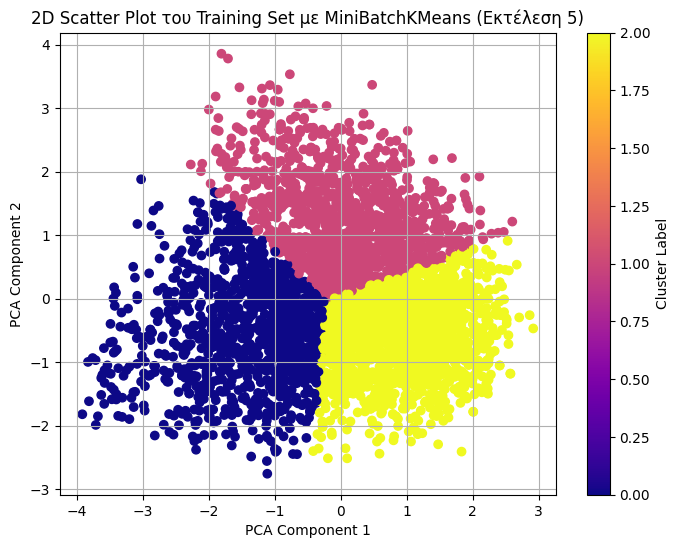


--- Συνολικά Αποτελέσματα ---
Εκτέλεση 1: Clusters=3, Silhouette Train=0.3658, Calinski-Harabasz Train=2914.8672, Davies-Bouldin Train=0.9053, ARI Train=1.0000, Inertia Train=4598.6835
Εκτέλεση 2: Clusters=3, Silhouette Train=0.3923, Calinski-Harabasz Train=3178.8005, Davies-Bouldin Train=0.8622, ARI Train=1.0000, Inertia Train=4291.7232
Εκτέλεση 3: Clusters=3, Silhouette Train=0.3939, Calinski-Harabasz Train=3165.3286, Davies-Bouldin Train=0.8530, ARI Train=1.0000, Inertia Train=4317.7307
Εκτέλεση 4: Clusters=3, Silhouette Train=0.3710, Calinski-Harabasz Train=2864.9380, Davies-Bouldin Train=0.9222, ARI Train=1.0000, Inertia Train=4690.5291
Εκτέλεση 5: Clusters=3, Silhouette Train=0.3737, Calinski-Harabasz Train=2987.7716, Davies-Bouldin Train=0.8951, ARI Train=1.0000, Inertia Train=4497.9659


In [17]:
#MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

# Στήλες που θέλουμε να κανονικοποιήσουμε
columns_to_normalize = ['danceability', 'energy', 'valence', 'tempo', 'popularity']

# Έλεγχος αν το df_reduced είναι DataFrame ή numpy array
if isinstance(df_reduced, pd.DataFrame):
    # Επιλέγουμε τις στήλες που θέλουμε να κανονικοποιήσουμε και τις μετατρέπουμε σε numpy array
    df_reduced_selected = df_reduced[columns_to_normalize].to_numpy()
else:
    # Αν είναι ήδη numpy array, θεωρούμε ότι οι στήλες είναι οι πρώτες 5
    df_reduced_selected = df_reduced[:, :5]  # Τροποποίησε αν οι στήλες είναι σε άλλες θέσεις

# Μείωση διαστάσεων με PCA
pca = PCA(n_components=2)  # Διατήρηση 2 διαστάσεων
df_reduced = pca.fit_transform(df_reduced_selected)

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση του MiniBatchKMeans 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, _ = train_test_split(df_reduced, test_size=0.2, random_state=iteration)

    # Δοκιμή για διαφορετικούς αριθμούς clusters στο MiniBatchKMeans
    n_clusters_values = range(2, 11)  # Τιμές clusters από 2 έως 10
    best_silhouette = -1
    best_n_clusters = None

    # Δοκιμή για διαφορετικούς αριθμούς clusters
    for n_clusters in n_clusters_values:
        minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=iteration, batch_size=32)
        cluster_labels_train = minibatch_kmeans.fit_predict(train_data)

        # Υπολογισμός Silhouette Score για το training set
        silhouette_avg = silhouette_score(train_data, cluster_labels_train)

        # Ενημέρωση βέλτιστου αριθμού βάσει Silhouette Score
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    print(f"Βέλτιστος αριθμός clusters: {best_n_clusters}")
    print(f"Βέλτιστο Silhouette Score: {best_silhouette:.4f}")

    # Εκτέλεση MiniBatchKMeans με το βέλτιστο n_clusters
    minibatch_kmeans_best = MiniBatchKMeans(n_clusters=best_n_clusters, random_state=iteration, batch_size=32)
    cluster_labels_train = minibatch_kmeans_best.fit_predict(train_data)

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data, cluster_labels_train)
    ari_train = adjusted_rand_score(cluster_labels_train, cluster_labels_train)
    inertia_train = minibatch_kmeans_best.inertia_

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "best_n_clusters": best_n_clusters,
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "ari_train": ari_train,
        "inertia_train": inertia_train
    })

    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"ARI: {ari_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")

    # Οπτικοποίηση 2D Scatter Plot για το training set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels_train, cmap='plasma', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με MiniBatchKMeans (Εκτέλεση {iteration})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Clusters={result['best_n_clusters']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Calinski-Harabasz Train={result['calinski_harabasz_train']:.4f}, "
          f"Davies-Bouldin Train={result['davies_bouldin_train']:.4f}, ARI Train={result['ari_train']:.4f}, "
          f"Inertia Train={result['inertia_train']:.4f}")



--- Εκτέλεση 1 ---
Βέλτιστο k: 2
Βέλτιστο Silhouette Score: 0.3135

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3135
Calinski-Harabasz Index: 1953.7628
Davies-Bouldin Index: 1.1068
Inertia: 607.1675

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3463
Calinski-Harabasz Index: 623.7986
Davies-Bouldin Index: 1.0401
Inertia: 151.1744


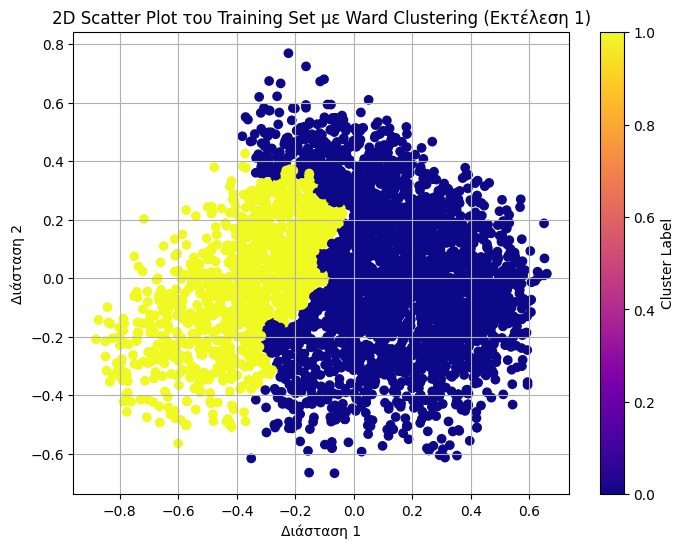


--- Εκτέλεση 2 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.3604

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3604
Calinski-Harabasz Index: 3037.1707
Davies-Bouldin Index: 0.8953
Inertia: 607.0907

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3448
Calinski-Harabasz Index: 669.1270
Davies-Bouldin Index: 0.9106
Inertia: 151.2382


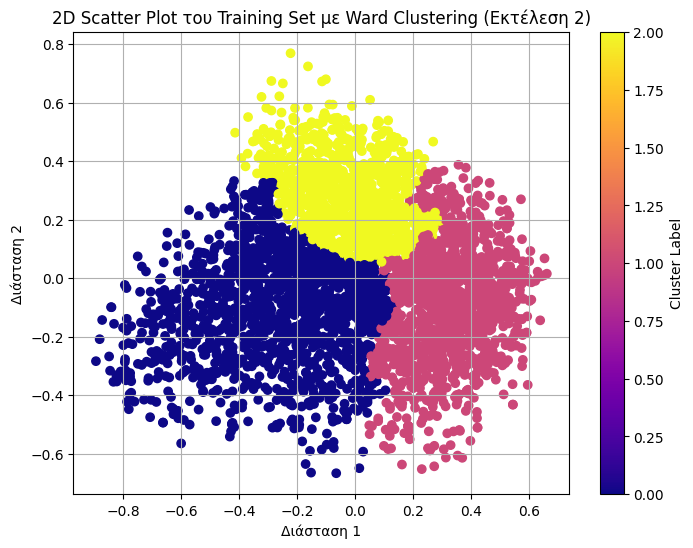


--- Εκτέλεση 3 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.3527

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3527
Calinski-Harabasz Index: 2870.7948
Davies-Bouldin Index: 0.9132
Inertia: 609.3387

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3471
Calinski-Harabasz Index: 656.9033
Davies-Bouldin Index: 0.8878
Inertia: 148.8206


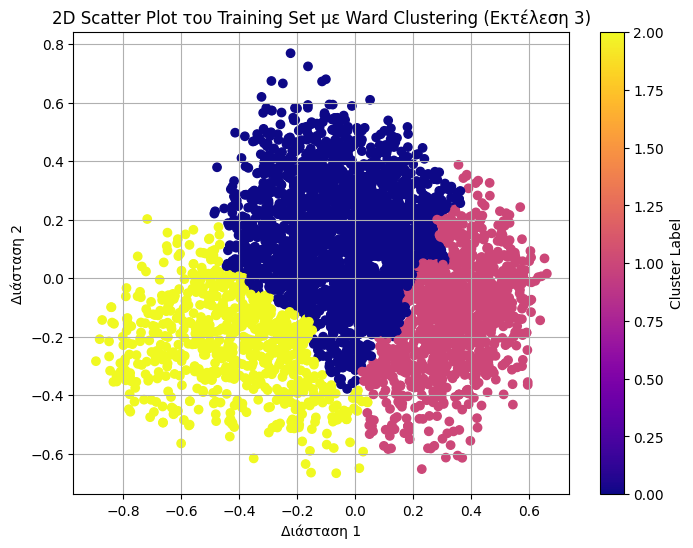


--- Εκτέλεση 4 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.3574

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3574
Calinski-Harabasz Index: 2965.5493
Davies-Bouldin Index: 0.9540
Inertia: 609.4871

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3180
Calinski-Harabasz Index: 593.8855
Davies-Bouldin Index: 0.9918
Inertia: 148.7250


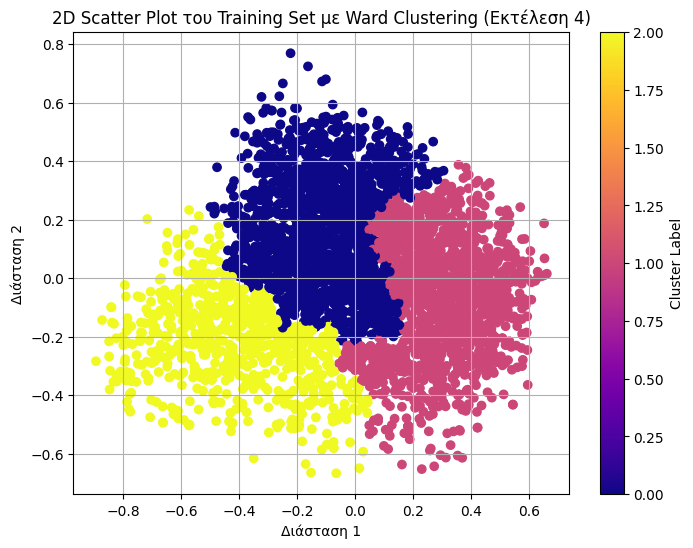


--- Εκτέλεση 5 ---
Βέλτιστο k: 2
Βέλτιστο Silhouette Score: 0.3705

--- Μετρικές στο Training Set ---
Silhouette Score: 0.3705
Calinski-Harabasz Index: 2799.5532
Davies-Bouldin Index: 1.0525
Inertia: 603.5646

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3002
Calinski-Harabasz Index: 492.1637
Davies-Bouldin Index: 1.1379
Inertia: 154.6185


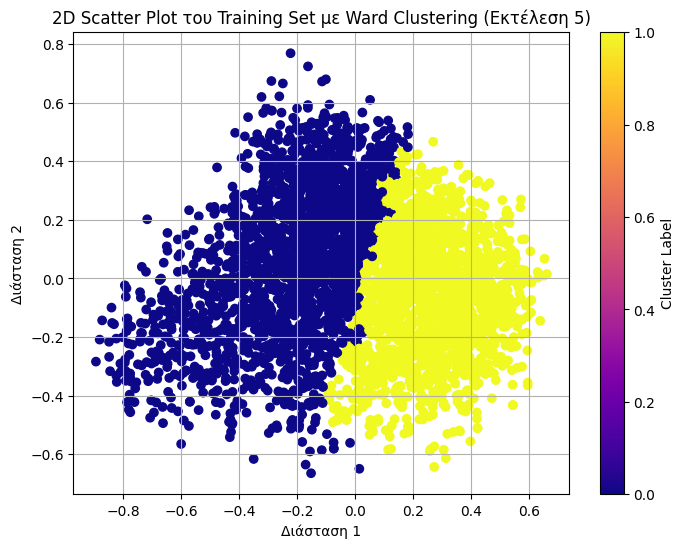


--- Συνολικά Αποτελέσματα ---
Εκτέλεση 1: Clusters=2, Silhouette Train=0.3135, Silhouette Test=0.3463116310181837, Inertia Train=607.1675, Inertia Test=151.17442909917668
Εκτέλεση 2: Clusters=3, Silhouette Train=0.3604, Silhouette Test=0.3448352997265191, Inertia Train=607.0907, Inertia Test=151.23821509174934
Εκτέλεση 3: Clusters=3, Silhouette Train=0.3527, Silhouette Test=0.3470833780312729, Inertia Train=609.3387, Inertia Test=148.82057557183072
Εκτέλεση 4: Clusters=3, Silhouette Train=0.3574, Silhouette Test=0.31803445983679074, Inertia Train=609.4871, Inertia Test=148.72496665786002
Εκτέλεση 5: Clusters=2, Silhouette Train=0.3705, Silhouette Test=0.30024772108687264, Inertia Train=603.5646, Inertia Test=154.618463915393


In [11]:
#ward
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση Ward Clustering 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, test_data = train_test_split(df_reduced, test_size=0.2, random_state=iteration)

    # Αριθμός Clusters (k)
    k_values = range(2, 11)  # Από 2 έως 10 clusters
    best_silhouette = -1
    best_k = None

    # Δοκιμή για διαφορετικά k
    for k in k_values:
        try:
            ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
            cluster_labels_train = ward.fit_predict(train_data)

            # Υπολογισμός Silhouette Score για το training set
            silhouette_avg = silhouette_score(train_data, cluster_labels_train)

            # Ενημέρωση βέλτιστου k βάσει Silhouette Score
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_k = k
        except ValueError:
            print(f"Δεν ήταν δυνατή η εκτέλεση με k={k}.")
            continue

    print(f"Βέλτιστο k: {best_k}")
    print(f"Βέλτιστο Silhouette Score: {best_silhouette:.4f}")

    # Εκτέλεση Ward Clustering με το βέλτιστο k
    ward_best = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
    cluster_labels_train = ward_best.fit_predict(train_data)

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data, cluster_labels_train)
    inertia_train = np.sum(np.min(cdist(train_data, np.expand_dims(train_data.mean(axis=0), axis=0), 'euclidean'), axis=1) ** 2)

    # Υπολογισμός μετρικών για το test set
    cluster_labels_test = ward_best.fit_predict(test_data)
    if len(np.unique(cluster_labels_test)) > 1:
        silhouette_test = silhouette_score(test_data, cluster_labels_test)
        calinski_harabasz_test = calinski_harabasz_score(test_data, cluster_labels_test)
        davies_bouldin_test = davies_bouldin_score(test_data, cluster_labels_test)
        inertia_test = np.sum(np.min(cdist(test_data, np.expand_dims(test_data.mean(axis=0), axis=0), 'euclidean'), axis=1) ** 2)
    else:
        silhouette_test = None
        calinski_harabasz_test = None
        davies_bouldin_test = None
        inertia_test = None
        print("Δεν υπάρχουν αρκετά clusters στο test set για υπολογισμό μετρικών.")

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "best_k": best_k,
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "inertia_train": inertia_train,
        "silhouette_test": silhouette_test,
        "calinski_harabasz_test": calinski_harabasz_test,
        "davies_bouldin_test": davies_bouldin_test,
        "inertia_test": inertia_test
    })

    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")

    print(f"\n--- Μετρικές στο Test Set ---")
    if silhouette_test is not None:
        print(f"Silhouette Score: {silhouette_test:.4f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_test:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin_test:.4f}")
        print(f"Inertia: {inertia_test:.4f}")
    else:
        print("Οι μετρικές δεν υπολογίστηκαν λόγω ανεπαρκούς αριθμού clusters.")

    # Οπτικοποίηση 2D Scatter Plot για το training set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels_train, cmap='plasma', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με Ward Clustering (Εκτέλεση {iteration})')
    plt.xlabel('Διάσταση 1')
    plt.ylabel('Διάσταση 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Clusters={result['best_k']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Silhouette Test={result['silhouette_test']}, "
          f"Inertia Train={result['inertia_train']:.4f}, Inertia Test={result['inertia_test']}")



--- Εκτέλεση 1 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.4000

--- Μετρικές στο Training Set ---
Silhouette Score: 0.4000
Calinski-Harabasz Index: 3525.6315
Davies-Bouldin Index: 0.8403
Inertia: 220.0928

--- Μετρικές στο Test Set ---
Silhouette Score: 0.4085
Calinski-Harabasz Index: 893.1393
Davies-Bouldin Index: 0.8356
Inertia: 54.5279


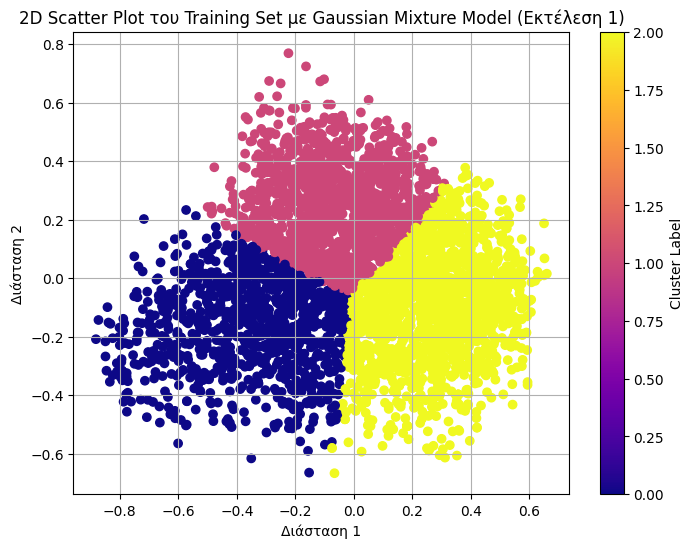


--- Εκτέλεση 2 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.4055

--- Μετρικές στο Training Set ---
Silhouette Score: 0.4055
Calinski-Harabasz Index: 3566.9723
Davies-Bouldin Index: 0.8344
Inertia: 218.1355

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3822
Calinski-Harabasz Index: 842.9582
Davies-Bouldin Index: 0.8709
Inertia: 56.3651


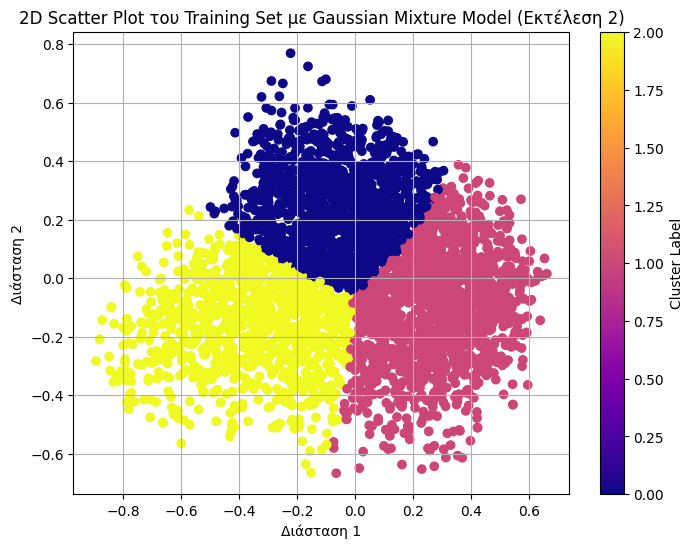


--- Εκτέλεση 3 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.4007

--- Μετρικές στο Training Set ---
Silhouette Score: 0.4007
Calinski-Harabasz Index: 3525.7780
Davies-Bouldin Index: 0.8431
Inertia: 221.1675

--- Μετρικές στο Test Set ---
Silhouette Score: 0.4074
Calinski-Harabasz Index: 895.9541
Davies-Bouldin Index: 0.8339
Inertia: 53.2552


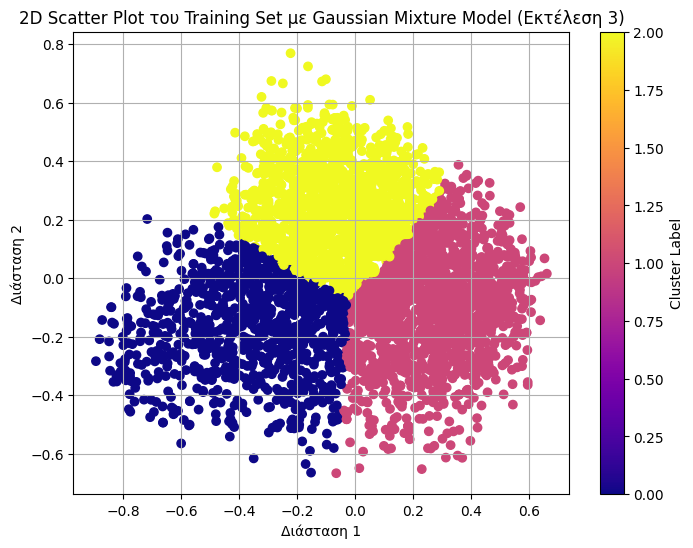


--- Εκτέλεση 4 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.4026

--- Μετρικές στο Training Set ---
Silhouette Score: 0.4026
Calinski-Harabasz Index: 3535.2256
Davies-Bouldin Index: 0.8383
Inertia: 220.4338

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3982
Calinski-Harabasz Index: 878.2548
Davies-Bouldin Index: 0.8425
Inertia: 53.8895


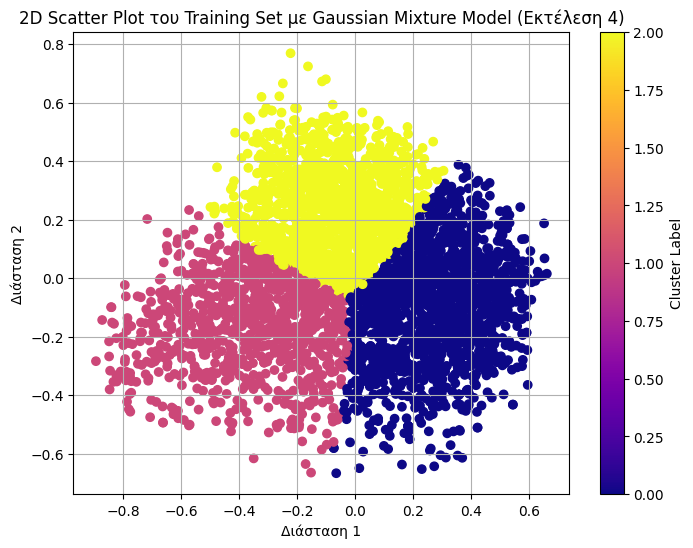


--- Εκτέλεση 5 ---
Βέλτιστο k: 3
Βέλτιστο Silhouette Score: 0.4027

--- Μετρικές στο Training Set ---
Silhouette Score: 0.4027
Calinski-Harabasz Index: 3544.9129
Davies-Bouldin Index: 0.8401
Inertia: 218.4157

--- Μετρικές στο Test Set ---
Silhouette Score: 0.3978
Calinski-Harabasz Index: 874.9178
Davies-Bouldin Index: 0.8451
Inertia: 56.2782


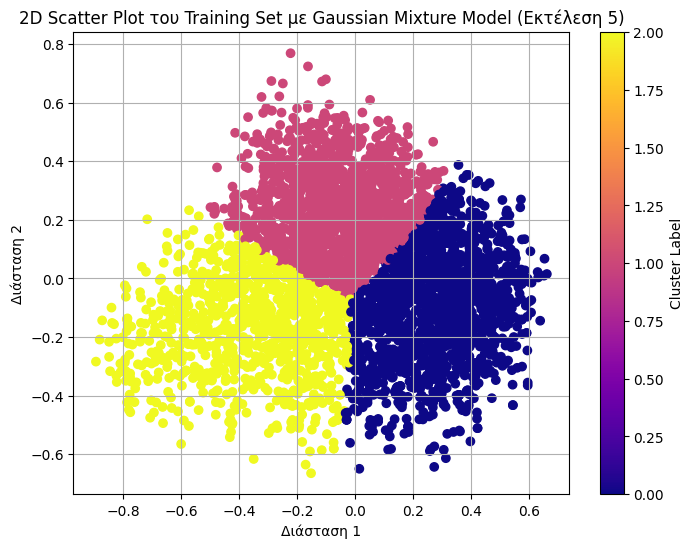


--- Συνολικά Αποτελέσματα ---
Εκτέλεση 1: Clusters=3, Silhouette Train=0.4000, Silhouette Test=0.40850749211638915, Inertia Train=220.0928, Inertia Test=54.52786303950995
Εκτέλεση 2: Clusters=3, Silhouette Train=0.4055, Silhouette Test=0.3822367973566207, Inertia Train=218.1355, Inertia Test=56.36509191946067
Εκτέλεση 3: Clusters=3, Silhouette Train=0.4007, Silhouette Test=0.4073670608199105, Inertia Train=221.1675, Inertia Test=53.255212105000005
Εκτέλεση 4: Clusters=3, Silhouette Train=0.4026, Silhouette Test=0.3982207240924821, Inertia Train=220.4338, Inertia Test=53.889524697381525
Εκτέλεση 5: Clusters=3, Silhouette Train=0.4027, Silhouette Test=0.3977597164756657, Inertia Train=218.4157, Inertia Test=56.278160102168314


In [12]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Αποτελέσματα για τις 5 εκτελέσεις
results_summary = []

# Εκτέλεση Gaussian Mixture Model 5 φορές
for iteration in range(1, 6):
    print(f"\n--- Εκτέλεση {iteration} ---")

    # Διαχωρισμός δεδομένων (Hold-Out Validation)
    train_data, test_data = train_test_split(df_reduced, test_size=0.2, random_state=iteration)

    # Αριθμός Clusters (k)
    k_values = range(2, 11)  # Από 2 έως 10 clusters
    best_silhouette = -1
    best_k = None

    # Δοκιμή για διαφορετικά k
    for k in k_values:
        try:
            gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=iteration)
            cluster_labels_train = gmm.fit_predict(train_data)

            # Υπολογισμός Silhouette Score για το training set
            silhouette_avg = silhouette_score(train_data, cluster_labels_train)

            # Ενημέρωση βέλτιστου k βάσει Silhouette Score
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_k = k
        except ValueError:
            print(f"Δεν ήταν δυνατή η εκτέλεση με k={k}.")
            continue

    print(f"Βέλτιστο k: {best_k}")
    print(f"Βέλτιστο Silhouette Score: {best_silhouette:.4f}")

    # Εκτέλεση GMM με το βέλτιστο k
    gmm_best = GaussianMixture(n_components=best_k, covariance_type='full', random_state=iteration)
    cluster_labels_train = gmm_best.fit_predict(train_data)

    # Υπολογισμός μετρικών για το training set
    silhouette_train = silhouette_score(train_data, cluster_labels_train)
    calinski_harabasz_train = calinski_harabasz_score(train_data, cluster_labels_train)
    davies_bouldin_train = davies_bouldin_score(train_data, cluster_labels_train)
    inertia_train = np.sum(np.min(cdist(train_data, gmm_best.means_, 'euclidean'), axis=1) ** 2)

    # Υπολογισμός μετρικών για το test set
    cluster_labels_test = gmm_best.predict(test_data)
    if len(np.unique(cluster_labels_test)) > 1:
        silhouette_test = silhouette_score(test_data, cluster_labels_test)
        calinski_harabasz_test = calinski_harabasz_score(test_data, cluster_labels_test)
        davies_bouldin_test = davies_bouldin_score(test_data, cluster_labels_test)
        inertia_test = np.sum(np.min(cdist(test_data, gmm_best.means_, 'euclidean'), axis=1) ** 2)
    else:
        silhouette_test = None
        calinski_harabasz_test = None
        davies_bouldin_test = None
        inertia_test = None
        print("Δεν υπάρχουν αρκετά clusters στο test set για υπολογισμό μετρικών.")

    # Αποθήκευση αποτελεσμάτων
    results_summary.append({
        "iteration": iteration,
        "best_k": best_k,
        "silhouette_train": silhouette_train,
        "calinski_harabasz_train": calinski_harabasz_train,
        "davies_bouldin_train": davies_bouldin_train,
        "inertia_train": inertia_train,
        "silhouette_test": silhouette_test,
        "calinski_harabasz_test": calinski_harabasz_test,
        "davies_bouldin_test": davies_bouldin_test,
        "inertia_test": inertia_test
    })

    print(f"\n--- Μετρικές στο Training Set ---")
    print(f"Silhouette Score: {silhouette_train:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_train:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_train:.4f}")
    print(f"Inertia: {inertia_train:.4f}")

    print(f"\n--- Μετρικές στο Test Set ---")
    if silhouette_test is not None:
        print(f"Silhouette Score: {silhouette_test:.4f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_test:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin_test:.4f}")
        print(f"Inertia: {inertia_test:.4f}")
    else:
        print("Οι μετρικές δεν υπολογίστηκαν λόγω ανεπαρκούς αριθμού clusters.")

    # Οπτικοποίηση 2D Scatter Plot για το training set
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data[:, 0], train_data[:, 1], c=cluster_labels_train, cmap='plasma', marker='o')
    plt.title(f'2D Scatter Plot του Training Set με Gaussian Mixture Model (Εκτέλεση {iteration})')
    plt.xlabel('Διάσταση 1')
    plt.ylabel('Διάσταση 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

# Τελικά Αποτελέσματα για τις 5 Εκτελέσεις
print("\n--- Συνολικά Αποτελέσματα ---")
for result in results_summary:
    print(f"Εκτέλεση {result['iteration']}: Clusters={result['best_k']}, "
          f"Silhouette Train={result['silhouette_train']:.4f}, Silhouette Test={result['silhouette_test']}, "
          f"Inertia Train={result['inertia_train']:.4f}, Inertia Test={result['inertia_test']}")
